# TWN Model Fitting

## Import Dataset - Internal Data and FT Data

In [1]:
# Customize Figure Style to Jupyter Themes
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
# jtplot.reset()

In [102]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
# % matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import joblib


pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [17]:
# load FTdata
FTdata = pd.read_csv('Data/FTdata for TWN model-noTU.csv')
print(FTdata.shape)
FTdata.head()

(29690, 411)


,ChannelIdentifier,MerchantIdentifier,StoreIdentifier,ClientTransactionID,TransactionDate,ApplicationID,TransactionStatus,ApprovedAmount,TransactionScore,Scores,RiskScore,Score,AdverseActions,AdverseAction,ProcessedServicesStatus,ReportLink,ResponseCodes,LoanPerformance,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,BankAccountLastReturnCode,NumberofCustomersonBankAccount,BankAccountLastReturnDate,BankAccountMismatch,SSNMismatch,DLMismatch,PayrollFrequencyMismatch,ResidenceStateMismatch,Bankruptcy,LastDateApplicationReceived,LastDelinquentDate,LastPaymentAmount,LastPaymentDate,HighRiskABA,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,LastDelinquentDateLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFLoanPerformance,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansinCollections,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansDelinquent,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFTotalAmountDelinquent,SFBankAccountLastReturnCode,SFBankAccountLastReturnDate,SFLastDateApplicationReceived,SFLastDelinquentDate,SFLastPaymentAmount,SFLastPaymentDate,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansDelinquentLastYear,SFTotalNumberofLoansOriginatedLastYear,SFTotalAmountDelinquentLastYear,SFLastDelinquentDateLastYear,SFNumberofLoansinCollectionsLastYear,SFNumberofLoansPaidOffLastYear,OLLoanPerformance,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLTotalAmountDelinquent,OLBankAccountLastReturnCode,OLBankAccountLastReturnDate,OLLastDateApplicationReceived,OLLastDelinquentDate,OLLastPaymentAmount,OLLastPaymentDate,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLTotalAmountDelinquentLastYear,OLLastDelinquentDateLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,OFAC,OFACDatabaseHit,IPGEO,AnonymousProxy,ProxyScore,DistancebetweenHomeZipandIPAddress,DistancebetweenHomeZipandAltZip,DistancebetweenAltZipandIPAddress,IPAddressOriginCountryHighRisk,IDV,AddressisCurrent,AddressisDeliverable,AddressisHighRisk,AddressisMailDrop,DriverLicenseMatchFullName,FirstNamePartialAddressMatch,FullNameAddressMatch,FullNameDOBMatch,FullNamePartialAddressMatch,FullNameYOBMatch,LastNameAddressMatch,LastNameDOBMatch,LastNamePartialAddressMatch,NameinInfractions,PhoneMatchesAddress,PhoneMatchesName,PropertyOwner,SSNDeathRecord,SSNFirstNameAddressMatch,SSNFirstNameExactMatch,SSNFirstNameMatch,SSNFullNameAddressMatch,SSNFullNameDateofBirthMatch,SSNFullNameMatch,SSNIssueDateMatch,SSNLastNameAddressMatch,SSNLastNameDateofBirthMatch,SSNLastNameExactMatch,SSNLastNameMatch,SSNVerified,SSNYearofBirthMatch,ACHLogic,BankItems,BankItem,BankAccountID,Buckets,PaymentToDate,StabilityLogic,BankAccounts,Ranges,DistinctSet,CellPhones,ConsumerIDs,Emails,HomePhones,IPAddresses,ZipCodes,EmploymentLogic_v12,EmployerDomainMatches,EmployerNames,HomeZipToWorkZipD

In [18]:
FTdata[pd.to_datetime(FTdata['TransactionDate']) >= '01/01/2021'].describe()

,ChannelIdentifier,MerchantIdentifier,StoreIdentifier,ClientTransactionID,ApplicationID,TransactionScore,Scores,RiskScore,Score,AdverseActions,AdverseAction,ResponseCodes,LoanPerformance,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,NumberofCustomersonBankAccount,LastPaymentAmount,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFLoanPerformance,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansinCollections,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansDelinquent,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFTotalAmountDelinquent,SFLastPaymentAmount,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansDelinquentLastYear,SFTotalNumberofLoansOriginatedLastYear,SFTotalAmountDelinquentLastYear,SFNumberofLoansinCollectionsLastYear,SFNumberofLoansPaidOffLastYear,OLLoanPerformance,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLTotalAmountDelinquent,OLLastPaymentAmount,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLTotalAmountDelinquentLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,OFAC,IPGEO,AnonymousProxy,ProxyScore,DistancebetweenHomeZipandIPAddress,DistancebetweenHomeZipandAltZip,DistancebetweenAltZipandIPAddress,IDV,NameinInfractions,PropertyOwner,ACHLogic,BankItems,BankItem,Buckets,StabilityLogic,BankAccounts,Ranges,DistinctSet,CellPhones,ConsumerIDs,Emails,HomePhones,IPAddresses,ZipCodes,EmploymentLogic_v12,PayDateMatchCount,EmployerMatchRatio,PayDateMatchRatio,PayFrequencyMatchRatio,ChexAdvisor,Privacy,MsgID,General,Consumer,SSN,Value,DateOfBirth,Name,Address,Zip,HomePhone,WorkPhone,AltSSNs,AltNames,AltName,AltAddresses,AltAddress,ConsumerStmt,Text1,Text2,Text3,DrivLicValidation,GovtNumValidation,PrevAcctInqSumm,NumPast30Days,NumPast60Days,NumPast90Days,NumPast180Days,NumPastYr,NumPast2Yrs,NumPast3Yrs,NumDaysSinceLastInquiry,NumDaysSinceFirstInquiry,CkOrdersSumm,NumDiffAccts,NumDaysSinceMostRecentOrder,NumDaysSinceFirstOrder,NumCksOrderedPast30Days,NumCksOrderedPast60Days,NumCksOrderedPast90Days,NumCksOrderedPast180Days,NumCksOrderedPastYr,NumCksOrderedPast2Yrs,NumCksOrderedPast3Yrs,MinNumCksOrdered,MaxNumCksOrdered,AvgNumCksOrdered,RetailSumm,NumOpenItemsPast30Days,NumOpenItemsPast60Days,NumOpenItemsPast90Days,NumOpenItemsPast180Days,NumOpenItemsPastYr,NumOpenItemsPast2Yrs,NumOpenItemsPast3Yrs,AmtOpenItemsPast30Days,AmtOpenItemsPast60Days,AmtOpenItemsPast90Days,AmtOpenItemsPast180Days,AmtOpenItemsPastYr,AmtOpenItemsPast2Yrs,AmtOpenItemsPast3Yrs,NumPaidItemsPast30Days,NumPaidItemsPast60Days,NumPaidItemsPast90Days,NumPaidItemsPast180Days,NumPaidItemsPastYr,NumPaidItemsPast2Yrs,NumPaidItemsPast3Yrs,AmtPaidItemsPast30Days,AmtPaidItemsPast60Days,AmtPaidItemsPast90Days,AmtPaidItemsPast180Days,AmtPaidItemsPastYr,AmtPaidItemsPast2Yrs,AmtPaidItemsPast3Yrs,NumDaysSinceMos

In [21]:
# load internal data
# Int_data = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/MFC Conversion Model/internal data.csv')
Int_data = pd.read_csv('Data/customer.csv')
Int_data['SubID'] = np.where((Int_data['SubID'] == 'npdlref') | (Int_data['SubID'] == 'tlusaRef'), 'mpd', Int_data['SubID'])
Int_data['StaticPool'] = Int_data['TotalPaid']/Int_data['TotalLend']
Int_data['Pre_Status'].fillna('BrandNew', inplace = True)
print(Int_data.shape)
Int_data.head()

(22493, 44)


,ApplicantID,ApprovalDte,Bank,Bankaccountlengthmonths,Monthsatresidence,Residencetype,MonthsOnJob,Salary,Age,Email_Domain,Payment_ratio,Directdeposit,State,abbr,Pre_Status,TimesAppliedAll,CarrierName,FraudRiskScore,RiskScore,PaidOffLoans_NewFT,PaidOffLoans,StoreID,Loanamount,Affiliate,AggregatedAFF,SubID,leadprice,FPD,Defaulted,Cycled,TotalPaid,TotalLend,TWNResponse,RequestDate,ResponseDate,ApplicantType2,ApplicantType3,EmployerNumbers,ActiveAccount,PaymentFrequency,PeriodPaymentInfo,PeriodIncome,MonthlyIncome,StaticPool
0,6065575,11/8/2019,US BANK NA,52.0,121.0,Rent,10,4334.0,51,hotmail.com,0.041532,False,California,CA,BrandNew,1,Sprint,89.0,823.0,NaN,6.0,Store 08,300,Organic,Organic,mpd,0,0,0,1,390.0,600.0,"[{""EmployerName"":"""",""EmployerCode"":"""",""Employm...",18:17.6,18:19.2,Manual-Approved,Manual-Approved,1,0,NaN,NaN,0.00,0.000000,0.65
1,6261382,12/19/2019,CAPITAL ONE N.A.,69.0,21.0,Rent,10,7667.0,58,yahoo.com,0.039129,True,California,CA,Rejected,2,AT+T Mobility,66.0,837.0,NaN,6.0,Store 14,500,LM25,Leads Market,408870,25,1,1,1,0.0,500.0,"[{""EmployerName"":""COMTECH TELECOM CORP"",""Emplo...",04:58.5,05:01.3,Manual-Approved,Manual-Approved,2,2,Biweekly,Hourly,44.23,7666.533333,0.00
2,5775836,8/28/2019,WELLS FARGO BANK NA,80.0,20.0,Rent,10,3200.0,30,gmail.com,0.093750,True,California,CA,BrandNew,1,T-Mobile,50.0,787.0,NaN,0.0,Store 08,500,Organic,Organic,mpd,0,0,0,1,600.0,500.0,"[{""EmployerName"":""Barnes & Noble Inc."",""Employ...",03:01.6,03:04.4,Auto-Approved,Auto-Approved,4,1,Biweekly,Hourly,18.00,3120.000000,1.20
3,6445281,2/18/2020,BANK OF AMERICA N.A.,36.0,48.0,Rent,10,2000.0,29,hotmail.com,0.120000,True,Rhode Island,RI,BrandNew,1,Sprint,50.0,705.0,0.0,NaN,Store 30,400,LM20,Leads Market,1942334,20,0,0,1,2040.0,400.0,"[{""EmployerName"":""Albertson,New Albertsons,Sup...",15:13.0,15:16.0,Manual-Approved,Manual-Approved,1,0,NaN,NaN,0.00,0.000000,5.10
4,5541904,7/11/2019,J.P. MORGAN CHASE BANK N.A.,60.0,24.0,Rent,11,7500.0,45,yahoo.com,0.048000,True,California,CA,BrandNew,1,Sprint,63.0,676.0,0.0,NaN,Store 30,600,Organic,Organic,mpd,0,0,0,1,1560.0,1200.0,"[{""EmployerName"":""AccentCare, Inc."",""EmployerC...",26:44.0,26:47.0,Manual-Approved,Manual-Approved,7,1,Biweekly,Bi-weekly,3882.31,8411.671667,1.30


In [22]:
Int_data[pd.to_datetime(Int_data['ApprovalDte']) >= '01/01/2021'].describe()

,ApplicantID,Bankaccountlengthmonths,Monthsatresidence,MonthsOnJob,Salary,Age,Payment_ratio,TimesAppliedAll,FraudRiskScore,RiskScore,PaidOffLoans_NewFT,PaidOffLoans,Loanamount,leadprice,FPD,Defaulted,Cycled,TotalPaid,TotalLend,EmployerNumbers,ActiveAccount,PeriodIncome,MonthlyIncome,StaticPool
count,2.058000e+03,1660.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2056.000000,2056.000000,2056.000000,0.0,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000,2058.000000,2058.000000,2045.000000,2.057000e+03,2058.000000
mean,7.067669e+06,40.554819,50.617104,10.749271,3766.080175,40.920311,0.070259,3.579689,94.591440,707.739300,8.281615,NaN,383.381924,19.931487,0.257532,0.224004,1.0,404.632206,483.535714,4.264820,0.764334,7328.775248,2.679825e+04,0.783146
std,5.890738e+04,68.459022,63.421180,3.097086,1776.371666,10.583716,0.026649,3.125742,121.869558,31.347672,19.961373,NaN,104.007362,10.572649,0.437381,0.417026,0.0,495.289971,316.725025,3.398409,0.635485,24486.209119,9.171991e+05,0.732864
min,6.962070e+06,1.000000,0.000000,10.000000,1000.000000,24.000000,0.013333,1.000000,-1.000000,635.000000,0.000000,NaN,200.000000,0.000000,0.000000,0.000000,1.0,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,7.013571e+06,12.000000,12.000000,10.000000,2500.000000,32.000000,0.050000,1.000000,59.000000,689.000000,0.000000,NaN,300.000000,15.000000,0.000000,0.000000,1.0,90.000000,300.000000,2.000000,0.000000,0.000000,0.000000e+00,0.300000
50%,7.074932e+06,30.000000,36.000000,10.000000,3413.000000,40.000000,0.064286,3.000000,75.000000,704.000000,3.000000,NaN,300.000000,25.000000,0.000000,0.000000,1.0,270.000000,500.000000,3.000000,1.000000,16.000000,2.648533e+03,0.600000
75%,7.117128e+06,40.000000,60.000000,10.000000,5000.000000,48.000000,0.090000,5.000000,91.000000,725.000000,9.000000,NaN,500.000000,25.000000,1.000000,0.000000,1.0,570.000000,500.000000,6.000000,1.000000,30.450000,4.258800e+03,1.200000
max,7.171991e+06,1110.000000,626.000000,36.000000,17125.000000,75.000000,0.180000,34.000000,930.000000,841.000000,196.000000,NaN,500.000000,75.000000,1.000000,1.000000,1.0,4160.000000,3600.000000,34.000000,7.000000,295000.000000,4.071539e+07,3.900000


In [23]:
# Join two datasets

data = pd.merge(FTdata, Int_data, left_on='ApplicationID', right_on='ApplicantID')
data = data[data['Cycled'] == 1]
# data = data[data['AffiliateCat'] == 'Organic']
# data = data[pd.to_datetime(data['TransactionDate']) >= '01/01/2020']
print(data.shape)
data.head()

(22314, 455)


,ChannelIdentifier,MerchantIdentifier,StoreIdentifier,ClientTransactionID,TransactionDate,ApplicationID,TransactionStatus,ApprovedAmount,TransactionScore,Scores,RiskScore_x,Score,AdverseActions,AdverseAction,ProcessedServicesStatus,ReportLink,ResponseCodes,LoanPerformance,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,BankAccountLastReturnCode,NumberofCustomersonBankAccount,BankAccountLastReturnDate,BankAccountMismatch,SSNMismatch,DLMismatch,PayrollFrequencyMismatch,ResidenceStateMismatch,Bankruptcy,LastDateApplicationReceived,LastDelinquentDate,LastPaymentAmount,LastPaymentDate,HighRiskABA,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,LastDelinquentDateLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFLoanPerformance,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansinCollections,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansDelinquent,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFTotalAmountDelinquent,SFBankAccountLastReturnCode,SFBankAccountLastReturnDate,SFLastDateApplicationReceived,SFLastDelinquentDate,SFLastPaymentAmount,SFLastPaymentDate,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansDelinquentLastYear,SFTotalNumberofLoansOriginatedLastYear,SFTotalAmountDelinquentLastYear,SFLastDelinquentDateLastYear,SFNumberofLoansinCollectionsLastYear,SFNumberofLoansPaidOffLastYear,OLLoanPerformance,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLTotalAmountDelinquent,OLBankAccountLastReturnCode,OLBankAccountLastReturnDate,OLLastDateApplicationReceived,OLLastDelinquentDate,OLLastPaymentAmount,OLLastPaymentDate,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLTotalAmountDelinquentLastYear,OLLastDelinquentDateLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,OFAC,OFACDatabaseHit,IPGEO,AnonymousProxy,ProxyScore,DistancebetweenHomeZipandIPAddress,DistancebetweenHomeZipandAltZip,DistancebetweenAltZipandIPAddress,IPAddressOriginCountryHighRisk,IDV,AddressisCurrent,AddressisDeliverable,AddressisHighRisk,AddressisMailDrop,DriverLicenseMatchFullName,FirstNamePartialAddressMatch,FullNameAddressMatch,FullNameDOBMatch,FullNamePartialAddressMatch,FullNameYOBMatch,LastNameAddressMatch,LastNameDOBMatch,LastNamePartialAddressMatch,NameinInfractions,PhoneMatchesAddress,PhoneMatchesName,PropertyOwner,SSNDeathRecord,SSNFirstNameAddressMatch,SSNFirstNameExactMatch,SSNFirstNameMatch,SSNFullNameAddressMatch,SSNFullNameDateofBirthMatch,SSNFullNameMatch,SSNIssueDateMatch,SSNLastNameAddressMatch,SSNLastNameDateofBirthMatch,SSNLastNameExactMatch,SSNLastNameMatch,SSNVerified,SSNYearofBirthMatch,ACHLogic,BankItems,BankItem,BankAccountID,Buckets,PaymentToDate,StabilityLogic,BankAccounts,Ranges,DistinctSet,CellPhones,ConsumerIDs,Emails,HomePhones,IPAddresses,ZipCodes,EmploymentLogic_v12,EmployerDomainMatches,EmployerNames,HomeZipToWorkZi

## Types of variables 

In [24]:
# 'ConsumerStatements', 'Indicator', 'Statements', 'ScoreDetail',

data.drop(['ChannelIdentifier', 'MerchantIdentifier', 'StoreIdentifier', 'ClientTransactionID', 'ApplicationID', 'ApprovedAmount', 'TransactionScore', 'Scores', 'AdverseActions','DrivLicNum','Date','CustName','ApplicantID','HomePhone','WorkPhone',\
           'AdverseAction', 'ProcessedServicesStatus', 'ReportLink', 'ResponseCodes', 'ReasonText1', 'ReasonText2', 'ReasonText3', 'ReasonText4', 'BankAccountID','MsgID','MsgText','FirstName','LastName','StreetAddress','City','State_x','Zip',\
           'LastDelinquentDateLastYear','OLLastDelinquentDateLastYear','SFLastDelinquentDateLastYear','OLBankAccountLastReturnDate', 'OLLastDelinquentDate','OLLastPaymentDate',\
           'PayDateMatchRatio', 'EmployerMatchRatio', 'PayFrequencyMatchRatio',\
          'abbr', 'CarrierName', 'PaidOffLoans','PaidOffLoans_NewFT', 'StoreID', 'AggregatedAFF', 'TotalPaid', 'TotalLend', 'TWNResponse', 'RequestDate', 'ResponseDate', 'ApplicantType2', 'ApplicantType3', 'StaticPool','PeriodPaymentInfo','PeriodIncome'], axis = 1, inplace = True)


In [25]:
def check_missing(data):
    for col in data.columns:
        print(col, '                      ', data[col].isnull().mean())
        if len(data[col].unique()) == 1 or data[col].isnull().mean() > 0.4:
            del data[col]

check_missing(data)


print(data.shape)
data.head()

TransactionDate                        0.0
TransactionStatus                        0.0
RiskScore_x                        1.0
Score                        0.7377431209106391
LoanPerformance                        1.0
NumberofLoansCurrent                        0.0003585193152281079
NumberofOpenLoans                        0.0003585193152281079
NumberofLoansinCollections                        0.0003585193152281079
NumberofLoansPaidOff                        0.0003585193152281079
NumberofLoansPastDue                        0.0003585193152281079
NumberofApplications                        0.0003585193152281079
NumberofApplications30                        0.0003585193152281079
NumberofApplications90                        0.0003585193152281079
NumberofApplicationsAllTime                        0.0003585193152281079
NumberofMerchants30                        0.0003585193152281079
NumberofMerchants90                        0.0003585193152281079
NumberofMerchantsAllTime                    

PhoneMatchesName                        0.00026888948642108095
PropertyOwner                        1.0
SSNDeathRecord                        0.00026888948642108095
SSNFirstNameAddressMatch                        0.00026888948642108095
SSNFirstNameExactMatch                        0.00026888948642108095
SSNFirstNameMatch                        0.00026888948642108095
SSNFullNameAddressMatch                        0.00026888948642108095
SSNFullNameDateofBirthMatch                        0.00026888948642108095
SSNFullNameMatch                        0.00026888948642108095
SSNIssueDateMatch                        0.00026888948642108095
SSNLastNameAddressMatch                        0.00026888948642108095
SSNLastNameDateofBirthMatch                        0.00026888948642108095
SSNLastNameExactMatch                        0.00026888948642108095
SSNLastNameMatch                        0.00026888948642108095
SSNVerified                        0.00026888948642108095
SSNYearofBirthMatch        

DdaAmtPaidPast5Yrs                        0.8381733440889128
NumUnpaidPast30Days                        0.9962355471901049
NumUnpaidPast60Days                        0.9962355471901049
NumUnpaidPast90Days                        0.9962355471901049
NumUnpaidPast180Days                        0.9962355471901049
NumUnpaidPastYr                        0.9962355471901049
NumUnpaidPast2Yrs                        0.9962355471901049
NumUnpaidPast3Yrs                        0.9962355471901049
NumUnpaidPast4Yrs                        0.9962355471901049
NumUnpaidPast5Yrs                        0.9962355471901049
DdaAmtUnpaidPast30Days                        0.8381733440889128
DdaAmtUnpaidPast60Days                        0.8381733440889128
DdaAmtUnpaidPast90Days                        0.8381733440889128
DdaAmtUnpaidPast180Days                        0.8381733440889128
DdaAmtUnpaidPastYr                        0.8381733440889128
DdaAmtUnpaidPast2Yrs                        0.8381733440889128
DdaAmtU

,TransactionDate,TransactionStatus,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,NumberofCustomersonBankAccount,BankAccountMismatch,SSNMismatch,DLMismatch,PayrollFrequencyMismatch,ResidenceStateMismatch,Bankruptcy,LastDateApplicationReceived,LastPaymentAmount,LastPaymentDate,HighRiskABA,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansinCollections,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansDelinquent,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFLastDateApplicationReceived,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansDelinquentLastYear,SFTotalNumberofLoansOriginatedLastYear,SFNumberofLoansinCollectionsLastYear,SFNumberofLoansPaidOffLastYear,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLLastDateApplicationReceived,OLLastPaymentAmount,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,DistancebetweenHomeZipandIPAddress,DistancebetweenHomeZipandAltZip,DistancebetweenAltZipandIPAddress,IPAddressOriginCountryHighRisk,AddressisCurrent,AddressisDeliverable,AddressisHighRisk,AddressisMailDrop,DriverLicenseMatchFullName,FirstNamePartialAddressMatch,FullNameAddressMatch,FullNameDOBMatch,FullNamePartialAddressMatch,FullNameYOBMatch,LastNameAddressMatch,LastNameDOBMatch,LastNamePartialAddressMatch,PhoneMatchesAddress,PhoneMatchesName,SSNDeathRecord,SSNFirstNameAddressMatch,SSNFirstNameExactMatch,SSNFirstNameMatch,SSNFullNameAddressMatch,SSNFullNameDateofBirthMatch,SSNFullNameMatch,SSNIssueDateMatch,SSNLastNameAddressMatch,SSNLastNameDateofBirthMatch,SSNLastNameExactMatch,SSNLastNameMatch,SSNVerified,SSNYearofBirthMatch,PaymentToDate,EmployerDomainMatches,EmployerNames,HomeZipToWorkZipDistances,IPAddressOriginDomains,MonthlyIncomes,PayDateMatchCount,PayDateMatchPercentage,PayDateMatchProjected,PayFrequencies,PayrollTypes,ProjectedPayDate,WorkZips,EmployerMatchPercentage,PayFrequencyMatchPercentage,ScorePercentage,NoDataFound,Value,DrivLicState,ReasonCode1,ReasonCode2,ReasonCode3,ReasonCode4,NoneFound,ApprovalDte,Bank,Bankaccountlengthmonths,Monthsatresidence,Residencetype,MonthsOnJob,Salary,Age,Email_Domain,Payment_ratio,Directdeposit,State_y,Pre_Status,TimesAppliedAll,FraudRiskScore,RiskScore_y,Loanamount,Affiliate,SubID,leadprice,FPD,Defaulted,EmployerNumbers,ActiveAccount,MonthlyIncome
0,3/18/2019 0:40,A,0.0,2.0,2.0,5.0,2.0,15.0,0.0,0.0,47.0,0.0,0.0,4.0,7.0,0.0,7.0,1634,0.0,0.0,Y,N,Y,Y,Y,N,9/25/2018 14:26,94.0,9/29/2018 0:00,Y,9.0,1.0,6.0,7.0,9.0,3587.0,2.0,2.0,2.0,1634.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0,3/27/2018 16:14,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,13.0,0.0,0.0,43.0,3.0,0.0,0.0,6.0,0.0,6.0,1634.0,9/25/2018 14:26,94.0,2.0,2.0,2.0,2.0,0

## Sample Centerness Check

In [26]:
import datetime
import collections
import numbers
import random
import sys
import pickle
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from importlib import reload
from sklearn.linear_model import LogisticRegressionCV

Text(0.5, 1.0, 'Largest Percentage of Single Value in Each Variable')

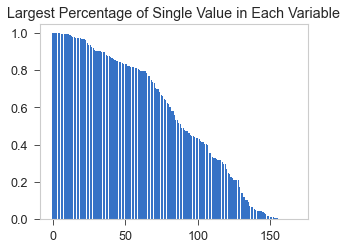

In [27]:
allFeatures = list(data.columns)
allFeatures.remove('FPD')

#检查是否有常数型变量，并且检查是类别型还是数值型变量
def find_cat_and_num(data):
    allFeatures = list(data.columns)
#     allFeatures.remove('FPD')
    numerical = []
    for col in allFeatures:
        if len(set(data[col])) == 1:
            print('delete {} from the dataset because it is a constant'.format(col))
            del data[col]
            allFeatures.remove(col)
        else:
            #uniq_vals = list(set(allData[col]))
            #if np.nan in uniq_vals:
                #uniq_vals.remove(np.nan)
            uniq_valid_vals = [i for i in data[col] if i == i]
            uniq_valid_vals = list(set(uniq_valid_vals))
            if len(uniq_valid_vals) >= 10 and isinstance(uniq_valid_vals[0], numbers.Real):
                numerical.append(col)

    categorical = [i for i in allFeatures if i not in numerical and i != 'FPD']
    return categorical, numerical

categorical, numerical = find_cat_and_num(data) 

#检查变量的最多值的占比情况,以及每个变量中占比最大的值
records_count = data.shape[0]
col_most_values,col_large_value = {},{}
for col in allFeatures:
    value_count = data[col].groupby(data[col]).count()
    col_most_values[col] = max(value_count)/records_count
    large_value = value_count[value_count== max(value_count)].index[0]
    col_large_value[col] = large_value
col_most_values_df = pd.DataFrame.from_dict(col_most_values, orient = 'index')
col_most_values_df.columns = ['max percent']
col_most_values_df = col_most_values_df.sort_values(by = 'max percent', ascending = False)
pcnt = list(col_most_values_df[:500]['max percent'])
vars = list(col_most_values_df[:500].index)
plt.bar(range(len(pcnt)), height = pcnt)
plt.title('Largest Percentage of Single Value in Each Variable')

## Data Cleaning!

### Clean Bank & Email Features

In [28]:
# data['Bank'].apply(lambda x: x.upper()).head(10) 
data['Bank'] = data['Bank'].str.upper() 
data['Email_Domain'] = data['Email_Domain'].str.upper() 
# data['CarrierName'] = data['CarrierName'].str.upper() 

list_i = []
for i in data['Bank']:
    if 'CHAS' in i:
        i = 'CHASE'
    elif 'BANK OF AMERICA' in i or 'BANKOFAMERICA' in i or 'BANKOF AMERICA' in i:
        i = 'BANK OF AMERICA'
    elif 'WELLS FARGO' in i:
        i = 'WELLS FARGO'
    elif 'PNC' in i:
        i = 'PNC'
    elif 'CITIBANK' in i:
        i = 'CITI'
    list_i.append(i)
data['Bank'] = list_i

# list_i = []
# for i in data['CarrierName']:
#     if type(i) == str:
#         if 'AT+T' in i:
#             i = 'AT+T'
#         elif 'T-MOBILE' in i:
#             i = 'T-MOBILE'
#         elif 'VERIZON' in i:
#             i = 'VERIZON'
#         elif 'SPRINT' in i:
#             i = 'SPRINT'
#     else:
#         i = i
#     list_i.append(i)
# data['CarrierName'] = list_i

### Parse the Employment Features
* EmployerDomainMatches, HomeZipToWorkZipDistances, IPAddressOriginDomains, MonthlyIncomes, PayFrequencies, PayrollTypes

In [29]:
#  'HomeZipToWorkZipDistances', 
parse = data[['EmployerDomainMatches', 'IPAddressOriginDomains', 'MonthlyIncomes', 'PayrollTypes']]

# for var in parse.columns:
#     parse[var].fillna('Blank', inplace = True)

for x in parse:
    list_i = []
    for i in parse[x]:
#         print(i, type(i))
        if type(i) == str:
            new_i = []
            for j in i[:30]:
                if j == '[' or j == '%':
                    break
                new_i.append(j)
            i = ''.join(new_i)
        list_i.append(i)
    data[x] = list_i

print(parse.dtypes)
parse.head()

# EmployerDomainMatches, HomeZipToWorkZipDistances, MonthlyIncomes are actually numerical

EmployerDomainMatches     object
IPAddressOriginDomains    object
MonthlyIncomes            object
PayrollTypes              object
dtype: object


,EmployerDomainMatches,IPAddressOriginDomains,MonthlyIncomes,PayrollTypes
0,"30%[9/25/2018,8/19/2018,8/10/2018,8/10/2018,7/...","verizonwireless.com[9/25/2018,8/10/2018,8/10/2...","7085.00[9/25/2018];4500.00[8/29/2018,6/8/2018,...","P[9/25/2018,7/16/2018,5/5/2018,12/21/2015,12/1..."
1,"00%[3/19/2019,3/19/2019,3/19/2019,3/16/2019,2/...","att.net[2/25/2019,2/25/2019,2/25/2019,2/25/201...",6583.00[3/19/2019];5880.00[3/19/2019];10000.00...,"D[3/19/2019,3/19/2019,2/25/2019,2/25/2019,2/25..."
2,"11%[12/13/2018,12/13/2018,11/7/2018,1/2/2018];...","mediacomcable.com[12/13/2018,12/13/2018,11/7/2...","5500.00[12/13/2018];6000.00[12/13/2018,9/20/20...","D[12/13/2018,12/13/2018,12/13/2018,12/8/2018,1..."
3,"15%[2/15/2019,1/14/2019,1/12/2019];23%[1/12/20...","att.net[2/15/2019,2/15/2019,2/15/2019,1/14/201...",0.00[2/15/2019];3000.00[1/14/2019];2500.00[1/1...,"D[1/14/2019,1/12/2019,1/12/2019,1/12/2019];P[1..."
4,"00%[3/20/2019,6/17/2013,6/17/2013]",NaN,2000.00[3/20/2019];4875.00[6/17/2013];2249.00[...,"P[3/20/2019];D[6/17/2013,6/17/2013]"


### Clean Categorical Percentages ( Employment Features)

In [30]:
# Delete the '%' from PayDateMatchPercentage(%), EmployerMatchPercentage(%), PayFrequencyMatchPercentage(%), ScorePercentage(%)
def p2f(x):
    if type(x) == str:
        return float(x.strip('%'))/100
    else:
        return x
# pass to convertes param as a dict
# df = pd.read_csv(io.StringIO(temp1), sep='\s+',index_col=[0], converters={'col':p2f})

cat_percent = ['PayDateMatchPercentage', 'EmployerMatchPercentage', 'PayFrequencyMatchPercentage', 'ScorePercentage']
for var in cat_percent:
    row_list = []
#     data[var].fillna('Blank', inplace = True)
    for i in data[var]:
        row_list.append(p2f(i))
    data[var] = row_list

data[cat_percent].describe()

,PayDateMatchPercentage,EmployerMatchPercentage,PayFrequencyMatchPercentage,ScorePercentage
count,20251.000000,19144.000000,19847.000000,17530.000000
mean,0.082187,0.569147,0.516165,0.502062
std,0.174455,0.280827,0.294869,0.212097
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.310000,0.270000,0.320000
50%,0.000000,0.600000,0.540000,0.530000
75%,0.060000,0.820000,0.770000,0.680000
max,1.000000,1.000000,1.000000,0.950000


### Transfer Categorical to Numeric

In [31]:
#  'HomeZipToWorkZipDistances',
cat_to_num = ['EmployerDomainMatches', 'MonthlyIncomes']

for var in cat_to_num:
    data[var] = pd.to_numeric(data[var])
    
data['EmployerDomainMatches'] = data['EmployerDomainMatches'].div(100)
data[cat_to_num].describe()

,EmployerDomainMatches,MonthlyIncomes
count,21318.000000,21257.000000
mean,0.085997,3645.868456
std,0.139673,6135.503757
min,0.000000,0.000000
25%,0.000000,1916.000000
50%,0.000000,3000.000000
75%,0.140000,4950.000000
max,1.000000,290400.000000


### Process Date Variables

In [32]:
#TransactionDate, BankAccountLastReturnDate, LastDateApplicationReceived, LastDelinquentDate, LastPaymentDate, SFLastDateApplicationReceived, OLBankAccountLastReturnDate, OLLastDateApplicationReceived, OLLastPaymentDate, 
# PayDateMatchProjected, ProjectedPayDate, PaymentToDate

from datetime import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

# def days_between(d1, d2):
#     d1 = datetime.strptime(d1, "%m/%d/%Y  %hh:%mm")
#     d2 = datetime.strptime(d2, "%m/%d/%Y  %hh:%mm")
#     return abs((d2 - d1).days)

#'BankAccountLastReturnDate', 'SFBankAccountLastReturnDate', 'LastDelinquentDate','SFLastDelinquentDate', 'SFLastPaymentDate',
datetime_var = ['LastDateApplicationReceived','SFLastDateApplicationReceived', 'LastPaymentDate',\
                'PayDateMatchProjected', 'ProjectedPayDate', 'PaymentToDate']

for var in datetime_var:
    data[var + 'diff'] = pd.to_datetime(data['TransactionDate']) - pd.to_datetime(data[var])
    data[var + 'diff'] = data[var + 'diff']/np.timedelta64(1,'D')
    numerical.append(var + 'diff')

data = data.drop(datetime_var, axis = 1)
# data.describe()

In [33]:
categorical, numerical = find_cat_and_num(data) 
numerical

['NumberofLoansCurrent',
 'NumberofOpenLoans',
 'NumberofLoansinCollections',
 'NumberofLoansPaidOff',
 'NumberofLoansPastDue',
 'NumberofApplications',
 'NumberofApplications30',
 'NumberofApplications90',
 'NumberofApplicationsAllTime',
 'NumberofMerchants90',
 'NumberofMerchantsAllTime',
 'NumberofNewLoansOriginated',
 'TotalNumberofLoansDelinquent',
 'TotalNumberofLoansOriginated',
 'TotalOSBalance',
 'TotalAmountDelinquent',
 'LastPaymentAmount',
 'CustomerDDACount',
 'CustomerDDACount1Year',
 'CustomerAddressCount',
 'FPDForABA',
 'FPDForABACount',
 'NumberofNewLoansOriginatedLastYear',
 'TotalNumberofLoansDelinquentLastYear',
 'TotalNumberofLoansOriginatedLastYear',
 'TotalAmountDelinquentLastYear',
 'NumberofLoansinCollectionsLastYear',
 'NumberofLoansPaidOffLastYear',
 'SFNumberofLoansCurrent',
 'SFNumberofOpenLoans',
 'SFNumberofLoansPaidOff',
 'SFNumberofLoansPastDue',
 'SFNumberofApplications',
 'SFNumberofApplications30',
 'SFNumberofApplications90',
 'SFNumberofApplicatio

In [34]:
categorical

['TransactionDate',
 'TransactionStatus',
 'NumberofMerchants30',
 'NumberofCustomersonBankAccount',
 'BankAccountMismatch',
 'SSNMismatch',
 'DLMismatch',
 'PayrollFrequencyMismatch',
 'ResidenceStateMismatch',
 'Bankruptcy',
 'HighRiskABA',
 'CustomerDDACount6Months',
 'SFNumberofLoansinCollections',
 'SFNumberofMerchants',
 'SFNumberofMerchants30',
 'SFNumberofMerchants90',
 'SFTotalNumberofLoansDelinquentLastYear',
 'SFNumberofLoansinCollectionsLastYear',
 'OLNumberofMerchants30',
 'OLLastDateApplicationReceived',
 'DistancebetweenHomeZipandAltZip',
 'IPAddressOriginCountryHighRisk',
 'AddressisCurrent',
 'AddressisDeliverable',
 'AddressisHighRisk',
 'AddressisMailDrop',
 'DriverLicenseMatchFullName',
 'FirstNamePartialAddressMatch',
 'FullNameAddressMatch',
 'FullNameDOBMatch',
 'FullNamePartialAddressMatch',
 'FullNameYOBMatch',
 'LastNameAddressMatch',
 'LastNameDOBMatch',
 'LastNamePartialAddressMatch',
 'PhoneMatchesAddress',
 'PhoneMatchesName',
 'SSNDeathRecord',
 'SSNFirst

In [35]:
check_missing(data)

TransactionDate                        0.0
TransactionStatus                        0.0
NumberofLoansCurrent                        0.0003585193152281079
NumberofOpenLoans                        0.0003585193152281079
NumberofLoansinCollections                        0.0003585193152281079
NumberofLoansPaidOff                        0.0003585193152281079
NumberofLoansPastDue                        0.0003585193152281079
NumberofApplications                        0.0003585193152281079
NumberofApplications30                        0.0003585193152281079
NumberofApplications90                        0.0003585193152281079
NumberofApplicationsAllTime                        0.0003585193152281079
NumberofMerchants30                        0.0003585193152281079
NumberofMerchants90                        0.0003585193152281079
NumberofMerchantsAllTime                        0.0003585193152281079
NumberofNewLoansOriginated                        0.0003585193152281079
TotalNumberofLoansDelinquent    

ReasonCode2                        0.09980281437662454
ReasonCode3                        0.1248991664425921
ReasonCode4                        0.13448955812494398
NoneFound                        0.030115622479161063
ApprovalDte                        0.0
Bank                        0.0
Bankaccountlengthmonths                        0.189298198440441
Monthsatresidence                        4.481491440351349e-05
Residencetype                        0.0
MonthsOnJob                        0.0
Salary                        0.0
Age                        0.0
Email_Domain                        0.0
Payment_ratio                        0.0
Directdeposit                        0.0
State_y                        0.0
Pre_Status                        0.0
TimesAppliedAll                        0.0
FraudRiskScore                        0.01259299094738729
RiskScore_y                        0.0
Loanamount                        0.0
Affiliate                        0.0
SubID                       

In [36]:
def check_cat_labels(cols):
    for var in cols:
        print(var, ' values: ', data[var].unique())

check_cat_labels(categorical)

TransactionDate  values:  ['3/18/2019 0:40' '3/19/2019 2:32' '3/19/2019 8:58' ... '11/28/2020 13:39'
 '12/9/2020 10:44' '11/24/2020 14:09']
TransactionStatus  values:  ['A' 'D']
NumberofMerchants30  values:  [ 0.  1.  2.  3.  4.  5.  6. nan  7.  8.]
NumberofCustomersonBankAccount  values:  [ 0.  1.  2. nan]
BankAccountMismatch  values:  ['Y' nan 'N']
SSNMismatch  values:  ['N' 'Y' nan]
DLMismatch  values:  ['Y' nan 'N']
PayrollFrequencyMismatch  values:  ['Y' nan 'N']
ResidenceStateMismatch  values:  ['Y' 'N' nan]
Bankruptcy  values:  ['N' nan 'Y']
HighRiskABA  values:  ['Y' 'N' nan]
CustomerDDACount6Months  values:  [ 1.  2.  0.  3.  4.  6.  5. nan  7.]
SFNumberofLoansinCollections  values:  [ 0. nan  2.  1.  3.  4.  6. 11.]
SFNumberofMerchants  values:  [ 1.  0. nan  2.  3.  4.  5.  6.]
SFNumberofMerchants30  values:  [ 0.  1. nan  2.  3.]
SFNumberofMerchants90  values:  [ 0.  1. nan  2.  3.  4.]
SFTotalNumberofLoansDelinquentLastYear  values:  [ 0. nan  2.  1.  3.  4.  8.  7.  5.  6

In [37]:
def check_type(df):
    for var in df.columns:
        print(var, '      ', df[var].dtypes)

check_type(data)

TransactionDate        object
TransactionStatus        object
NumberofLoansCurrent        float64
NumberofOpenLoans        float64
NumberofLoansinCollections        float64
NumberofLoansPaidOff        float64
NumberofLoansPastDue        float64
NumberofApplications        float64
NumberofApplications30        float64
NumberofApplications90        float64
NumberofApplicationsAllTime        float64
NumberofMerchants30        float64
NumberofMerchants90        float64
NumberofMerchantsAllTime        float64
NumberofNewLoansOriginated        float64
TotalNumberofLoansDelinquent        float64
TotalNumberofLoansOriginated        float64
TotalOSBalance        int64
TotalAmountDelinquent        float64
NumberofCustomersonBankAccount        float64
BankAccountMismatch        object
SSNMismatch        object
DLMismatch        object
PayrollFrequencyMismatch        object
ResidenceStateMismatch        object
Bankruptcy        object
LastPaymentAmount        float64
HighRiskABA        object
Cust

In [38]:
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} numerical variables'.format(len(numerical)))

There are 77 categorical variables
There are 91 numerical variables


<BarContainer object of 34 artists>

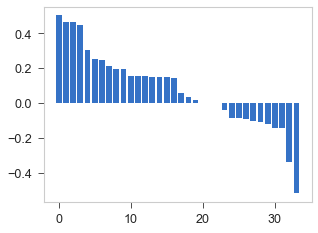

In [39]:
#计算多数值产比超过90%的字段中，少数值的坏样本率是否会显著高于多数值 -- 两者坏样本率比值的对数小于log(10), 也就是2.303
large_percent_cols = list(col_most_values_df[col_most_values_df['max percent']>=0.9].index)
bad_rate_diff = {}
for col in large_percent_cols:
    large_value = col_large_value[col]
    temp = data[[col,'FPD']]
    temp[col] = temp.apply(lambda x: int(x[col]==large_value),axis=1)
    bad_rate = temp.groupby(col).mean()
    if bad_rate.iloc[0]['FPD'] == 0:
        bad_rate_diff[col] = 0
        continue
    bad_rate_diff[col] = np.log(bad_rate.iloc[0]['FPD']/bad_rate.iloc[1]['FPD'])
bad_rate_diff_sorted = sorted(bad_rate_diff.items(),key=lambda x: x[1], reverse=True)
bad_rate_diff_sorted_values = [x[1] for x in bad_rate_diff_sorted]
plt.bar(x = range(len(bad_rate_diff_sorted_values)), height = bad_rate_diff_sorted_values)

In [40]:
large_percent_cols

['SSNDeathRecord',
 'SSNFirstNameMatch',
 'SSNVerified',
 'DistancebetweenHomeZipandAltZip',
 'IPAddressOriginCountryHighRisk',
 'SSNYearofBirthMatch',
 'SSNLastNameMatch',
 'DriverLicenseMatchFullName',
 'SSNFullNameMatch',
 'FullNameYOBMatch',
 'AddressisDeliverable',
 'AddressisMailDrop',
 'SSNFirstNameExactMatch',
 'SSNLastNameExactMatch',
 'SSNLastNameDateofBirthMatch',
 'SSNFullNameDateofBirthMatch',
 'FullNameDOBMatch',
 'NoneFound',
 'NoDataFound',
 'Bankruptcy',
 'LastNameDOBMatch',
 'Directdeposit',
 'HighRiskABA',
 'AddressisHighRisk',
 'SFNumberofLoansinCollectionsLastYear',
 'SFNumberofLoansinCollections',
 'SFTotalNumberofLoansDelinquentLastYear',
 'DLMismatch',
 'SFTotalNumberofLoansDelinquent',
 'AddressisCurrent',
 'SSNFirstNameAddressMatch',
 'SSNLastNameAddressMatch',
 'LastNamePartialAddressMatch',
 'SSNFullNameAddressMatch']

In [41]:
#由于所有的少数值的坏样本率并没有显著高于多数值，意味着这些变量可以直接剔除
for col in large_percent_cols:
    if col in numerical:
        numerical.remove(col)
    else:
        categorical.remove(col)
    del data[col]

In [42]:
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} numerical variables'.format(len(numerical)))

There are 44 categorical variables
There are 90 numerical variables


In [43]:
categorical

['TransactionDate',
 'TransactionStatus',
 'NumberofMerchants30',
 'NumberofCustomersonBankAccount',
 'BankAccountMismatch',
 'SSNMismatch',
 'PayrollFrequencyMismatch',
 'ResidenceStateMismatch',
 'CustomerDDACount6Months',
 'SFNumberofMerchants',
 'SFNumberofMerchants30',
 'SFNumberofMerchants90',
 'OLNumberofMerchants30',
 'OLLastDateApplicationReceived',
 'FirstNamePartialAddressMatch',
 'FullNameAddressMatch',
 'FullNamePartialAddressMatch',
 'LastNameAddressMatch',
 'PhoneMatchesAddress',
 'PhoneMatchesName',
 'SSNIssueDateMatch',
 'EmployerNames',
 'HomeZipToWorkZipDistances',
 'IPAddressOriginDomains',
 'PayFrequencies',
 'PayrollTypes',
 'WorkZips',
 'DrivLicState',
 'ReasonCode1',
 'ReasonCode2',
 'ReasonCode3',
 'ReasonCode4',
 'ApprovalDte',
 'Bank',
 'Residencetype',
 'MonthsOnJob',
 'Email_Domain',
 'State_y',
 'Pre_Status',
 'Loanamount',
 'Affiliate',
 'SubID',
 'Defaulted',
 'ActiveAccount']

In [44]:
numerical

['NumberofLoansCurrent',
 'NumberofOpenLoans',
 'NumberofLoansinCollections',
 'NumberofLoansPaidOff',
 'NumberofLoansPastDue',
 'NumberofApplications',
 'NumberofApplications30',
 'NumberofApplications90',
 'NumberofApplicationsAllTime',
 'NumberofMerchants90',
 'NumberofMerchantsAllTime',
 'NumberofNewLoansOriginated',
 'TotalNumberofLoansDelinquent',
 'TotalNumberofLoansOriginated',
 'TotalOSBalance',
 'TotalAmountDelinquent',
 'LastPaymentAmount',
 'CustomerDDACount',
 'CustomerDDACount1Year',
 'CustomerAddressCount',
 'FPDForABA',
 'FPDForABACount',
 'NumberofNewLoansOriginatedLastYear',
 'TotalNumberofLoansDelinquentLastYear',
 'TotalNumberofLoansOriginatedLastYear',
 'TotalAmountDelinquentLastYear',
 'NumberofLoansinCollectionsLastYear',
 'NumberofLoansPaidOffLastYear',
 'SFNumberofLoansCurrent',
 'SFNumberofOpenLoans',
 'SFNumberofLoansPaidOff',
 'SFNumberofLoansPastDue',
 'SFNumberofApplications',
 'SFNumberofApplications30',
 'SFNumberofApplications90',
 'SFNumberofApplicatio

### Chi-square Testing for Categorical Variables

In [45]:
from scipy import stats

# return significant categorical features
def Chi(dataset, y, cols = categorical):
    useful = []
    sig = []
    for col in cols:
        contingency_table = pd.crosstab(
            dataset[col],
            y,
            margins = True
                        )
        print(col,':')
        print(contingency_table, end = '                                              ')
        if contingency_table.iloc[1][1] > contingency_table.iloc[1][0]:
            print('Possibly Useful\n')
            useful.append(col)
        else:
            print('\n')

        a = []        
        j = len(contingency_table.iloc[0,:]) - 1     # of table column 
        for i in range(len(contingency_table.iloc[:,0]) - 1):
            f_obs = np.array([contingency_table.iloc[i][0:j].values])
            a.append(f_obs)

        print('Chi-square, p-value, and degree of freedom:')
        print(':         ', stats.chi2_contingency(a)[0:3], end = '                                     ')
        if stats.chi2_contingency(a)[1] <= 0.05:
            print('Significant')
            print('\n')
            sig.append(col)
        else:
#             dataset.drop(col, axis = 1, inplace = True)
            print('\n\n')
    print('Possibly useful features for filters\n' + str(useful))
    print('Significant variables:\n' + str(sig) + '\n\n---------------------------------------------')
#     print(dataset)
    return sig


sig_cat_var = Chi(data, data.FPD)
# for var in X_test.columns:
#     if var not in X_train.columns:
#         X_test.drop(var, axis = 1, inplace = True)
# Chi(X_test, y_test)

TransactionDate :
FPD                  0     1    All
TransactionDate                    
1/1/2019 11:23       1     0      1
1/1/2019 11:58       1     0      1
1/1/2019 12:04       1     0      1
1/1/2019 12:44       1     0      1
1/1/2019 14:28       1     0      1
...                ...   ...    ...
9/9/2020 9:02        1     0      1
9/9/2020 9:18        1     0      1
9/9/2020 9:20        1     0      1
9/9/2020 9:51        1     0      1
All              18303  4011  22314

[21785 rows x 3 columns]                                              

Chi-square, p-value, and degree of freedom:
:          (21735.23984219596, 0.5893183082651327, 21783)                                     


TransactionStatus :
FPD                    0     1    All
TransactionStatus                    
A                  15239  3106  18345
D                   3064   905   3969
All                18303  4011  22314                                              

Chi-square, p-value, and degree of freedom:

SSNIssueDateMatch :
FPD                    0     1    All
SSNIssueDateMatch                    
N                   4486  1191   5677
Y                  13811  2820  16631
All                18297  4011  22308                                              

Chi-square, p-value, and degree of freedom:
:          (46.17782797457921, 1.0799219707692517e-11, 1)                                     Significant


EmployerNames :
FPD                                                     0     1    All
EmployerNames                                                         
(NOT PROVIDED)[2/28/2019];VOLT STAFFING MANAGEM...      1     0      1
1 A 1 TUTORIA[12/23/2014,12/5/2014,11/26/2014,1...      1     0      1
1-800-HANSONS[5/3/2021,5/3/2021,4/14/2021];UPS[...      1     0      1
10-15 TRANSIT[9/6/2019,8/7/2019,8/6/2019,1/7/20...      1     0      1
115 TRUCK STOP[3/15/2019];115 TRUCK STOP, INC[3...      1     0      1
...                                                   ...   ...    ...
ZUMIE[9

Chi-square, p-value, and degree of freedom:
:          (19.17097815273739, 0.15851842756370874, 14)                                     


ReasonCode4 :
FPD              0     1    All
ReasonCode4                    
EB             145    41    186
ED            2017   556   2573
EF            7483  1557   9040
EH             135    47    182
EI              71    27     98
EK               4     0      4
EL               8     1      9
EM            5950  1265   7215
FF               2     0      2
FG               2     0      2
GE               2     0      2
All          15819  3494  19313                                              

Chi-square, p-value, and degree of freedom:
:          (45.32604436656014, 1.8990863893411218e-06, 10)                                     Significant


ApprovalDte :
FPD              0     1    All
ApprovalDte                    
1/10/2019       30     5     35
1/10/2020       19     1     20
1/10/2021        1     0      1
1/11/2019       36     2 

Chi-square, p-value, and degree of freedom:
:          (3878.4169714934096, 0.0034993762648969948, 3644)                                     Significant


Defaulted :
FPD            0     1    All
Defaulted                    
0          18247   930  19177
1             56  3081   3137
All        18303  4011  22314                                              Possibly Useful

Chi-square, p-value, and degree of freedom:
:          (15932.945599620161, 0.0, 1)                                     Significant


ActiveAccount :
FPD                0     1    All
ActiveAccount                    
0               7840  1392   9232
1               9435  2421  11856
2                903   186   1089
3                106    12    118
4                 14     0     14
5                  1     0      1
6                  3     0      3
7                  1     0      1
All            18303  4011  22314                                              

Chi-square, p-value, and degree of freedom:
:     

## Separate train and test set

In [46]:
# separate data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.FPD, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((15619, 135), (6695, 135))

## Treat Missing

In [47]:
# Fill the missing values 
# Mark NaN for features that have more than 5% missing values: 
missing_treatment = []
missing_imputation = {}

for var in X_train.columns:
    if X_train[var].isnull().mean() > 0.05:
#         X_train['M_'+ var] = np.where(X_train[var].isnull(), 1, 0)
#         X_test['M_'+ var] = np.where(X_test[var].isnull(), 1, 0)
#         numerical.append('M_'+ var)
        if X_train[var].dtypes == 'O':
            missing_treatment.append(var)
            X_train[var] = np.where(X_train[var].isnull(), 'Missing', X_train[var])
            X_test[var] = np.where(X_test[var].isnull(), 'Missing', X_test[var])
        else:
            X_train[var].fillna(X_train[var].median(), inplace = True) 
            X_test[var].fillna(X_train[var].median(), inplace = True) 
            missing_imputation[var] = X_train[var].median()
            print(var, X_train[var].median())
    else:
        if X_train[var].dtypes == 'O':
            most_freq_cat = X_train.groupby([var])[var].count().sort_values(ascending = False).index[0]
            X_train[var].fillna(most_freq_cat, inplace = True)
            X_test[var].fillna(most_freq_cat, inplace = True)
            missing_imputation[var] = most_freq_cat
            print(var, most_freq_cat)
        else:
            X_train[var].fillna(X_train[var].median(), inplace = True) 
            X_test[var].fillna(X_train[var].median(), inplace = True) 
            missing_imputation[var] = X_train[var].median()
            print(var, X_train[var].median())             
            
# Mark "Unknown" for BankAccountID
# for dataset in [X_train, X_test]:
#     dataset['M_BankAccountID'] = np.where(dataset['BankAccountID'] == 'Unknown Unknown', 1, 0)
#     dataset.drop(['BankAccountID', 'DrivLicState'], axis = 1, inplace = True)

TransactionDate 8/26/2020 9:00
TransactionStatus A
NumberofLoansCurrent 0.0
NumberofOpenLoans 2.0
NumberofLoansinCollections 0.0
NumberofLoansPaidOff 4.0
NumberofLoansPastDue 1.0
NumberofApplications 4.0
NumberofApplications30 1.0
NumberofApplications90 2.0
NumberofApplicationsAllTime 21.0
NumberofMerchants30 0.0
NumberofMerchants90 0.0
NumberofMerchantsAllTime 2.0
NumberofNewLoansOriginated 3.0
TotalNumberofLoansDelinquent 0.0
TotalNumberofLoansOriginated 7.0
TotalOSBalance 600.0
TotalAmountDelinquent 0.0
NumberofCustomersonBankAccount 1.0
BankAccountMismatch Y
SSNMismatch N
PayrollFrequencyMismatch Y
ResidenceStateMismatch N
LastPaymentAmount 239.0
CustomerDDACount 2.0
CustomerDDACount6Months 1.0
CustomerDDACount1Year 1.0
CustomerAddressCount 2.0
FPDForABA 7.0
FPDForABACount 3662.0
NumberofNewLoansOriginatedLastYear 1.0
TotalNumberofLoansDelinquentLastYear 0.0
TotalNumberofLoansOriginatedLastYear 3.0
TotalAmountDelinquentLastYear 0.0
NumberofLoansinCollectionsLastYear 0.0
NumberofLoa

In [48]:
missing_treatment

['OLLastDateApplicationReceived',
 'EmployerNames',
 'HomeZipToWorkZipDistances',
 'IPAddressOriginDomains',
 'PayrollTypes',
 'WorkZips',
 'DrivLicState',
 'ReasonCode2',
 'ReasonCode3',
 'ReasonCode4']

In [49]:
check_missing(X_train)

TransactionDate                        0.0
TransactionStatus                        0.0
NumberofLoansCurrent                        0.0
NumberofOpenLoans                        0.0
NumberofLoansinCollections                        0.0
NumberofLoansPaidOff                        0.0
NumberofLoansPastDue                        0.0
NumberofApplications                        0.0
NumberofApplications30                        0.0
NumberofApplications90                        0.0
NumberofApplicationsAllTime                        0.0
NumberofMerchants30                        0.0
NumberofMerchants90                        0.0
NumberofMerchantsAllTime                        0.0
NumberofNewLoansOriginated                        0.0
TotalNumberofLoansDelinquent                        0.0
TotalNumberofLoansOriginated                        0.0
TotalOSBalance                        0.0
TotalAmountDelinquent                        0.0
NumberofCustomersonBankAccount                        0.0
BankA

In [50]:
check_missing(X_test)

TransactionDate                        0.0
TransactionStatus                        0.0
NumberofLoansCurrent                        0.0
NumberofOpenLoans                        0.0
NumberofLoansinCollections                        0.0
NumberofLoansPaidOff                        0.0
NumberofLoansPastDue                        0.0
NumberofApplications                        0.0
NumberofApplications30                        0.0
NumberofApplications90                        0.0
NumberofApplicationsAllTime                        0.0
NumberofMerchants30                        0.0
NumberofMerchants90                        0.0
NumberofMerchantsAllTime                        0.0
NumberofNewLoansOriginated                        0.0
TotalNumberofLoansDelinquent                        0.0
TotalNumberofLoansOriginated                        0.0
TotalOSBalance                        0.0
TotalAmountDelinquent                        0.0
NumberofCustomersonBankAccount                        0.0
BankA

In [51]:
print(X_train.shape, X_test.shape)

(15619, 135) (6695, 135)


In [52]:
for i in X_test.columns:
    if i not in X_train.columns:
        X_test.drop(i, axis = 1, inplace = True)
        
for i in X_train.columns:
    if i not in X_test.columns:
        X_train.drop(i, axis = 1, inplace = True)

In [53]:
categorical, numerical = find_cat_and_num(X_train)

In [54]:
print(X_train.shape, X_test.shape)

(15619, 135) (6695, 135)


In [55]:
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} numerical variables'.format(len(numerical)))

There are 45 categorical variables
There are 89 numerical variables


## Categorical Rare Imputation

In [56]:
# find unfrequent labels in categorical variables
def check_cat_wt(cols, dataset):
    for var in cols:
        print(var, dataset[var].value_counts()/np.float(len(dataset)), dataset.groupby([var])['FPD'].mean())
        print()
    

check_cat_wt(categorical, X_train)

TransactionDate 11/30/2020 9:02     0.000192
6/12/2019 16:08     0.000192
8/26/2020 9:00      0.000192
8/5/2019 18:14      0.000128
11/30/2020 10:54    0.000128
                      ...   
5/12/2020 14:55     0.000064
2/10/2020 15:50     0.000064
4/21/2019 22:42     0.000064
12/17/2020 10:00    0.000064
5/20/2020 11:30     0.000064
Name: TransactionDate, Length: 15355, dtype: float64 TransactionDate
1/1/2019 12:04    0.0
1/1/2019 12:44    0.0
1/1/2019 14:28    0.0
1/1/2019 16:16    0.0
1/1/2019 16:39    1.0
                 ... 
9/9/2020 1:37     1.0
9/9/2020 2:12     0.0
9/9/2020 9:02     0.0
9/9/2020 9:18     0.0
9/9/2020 9:51     0.0
Name: FPD, Length: 15355, dtype: float64

TransactionStatus A    0.824445
D    0.175555
Name: TransactionStatus, dtype: float64 TransactionStatus
A    0.168207
D    0.237783
Name: FPD, dtype: float64

NumberofMerchants30 0.0    0.647737
1.0    0.226455
2.0    0.093988
3.0    0.023369
4.0    0.006210
5.0    0.001857
6.0    0.000256
8.0    0.000064
7.0  

PayFrequencies B[11/1/2020,10/2/2020,2/4/2020,2/4/2020,10/1/2015,8/14/2015];S[9/22/2015]                                                                                                                                                                                                                                                                                                                                    0.049171
W[11/21/2020];C[11/20/2020];B[11/13/2020,11/12/2020,11/12/2020,10/28/2020,10/28/2020,10/1/2020,10/1/2020,9/17/2020,9/17/2020,9/17/2020,5 older dates];BI WEEKLY[11/12/2020,10/7/2020,9/17/2020];OW[6/1/2020]                                                                                                                                                                                                 0.002177
S[11/23/2020,11/20/2020,10/28/2020,10/8/2020,8/11/2020,7/26/2020,6/28/2020,6/25/2020,6/15/2020,6/5/2020,9 older dates];C[11/23/2020,10/23/2020,10/1/2020,9/1/2020,8/1/2020,7/

ReasonCode2 EJ         0.703438
EK         0.116397
Missing    0.099366
EB         0.036494
GD         0.021640
GB         0.012229
ED         0.007171
EH         0.001024
EL         0.000896
GC         0.000512
EG         0.000384
FE         0.000320
EC         0.000064
GE         0.000064
Name: ReasonCode2, dtype: float64 ReasonCode2
EB         0.168421
EC         0.000000
ED         0.285714
EG         0.000000
EH         0.312500
EJ         0.175389
EK         0.220022
EL         0.357143
FE         0.000000
GB         0.198953
GC         0.500000
GD         0.201183
GE         0.000000
Missing    0.156572
Name: FPD, dtype: float64

ReasonCode3 EB         0.817466
Missing    0.124144
ED         0.035790
GD         0.004674
GB         0.004546
EK         0.003970
EM         0.003905
EL         0.002689
EJ         0.001088
EH         0.000576
GE         0.000448
EC         0.000192
FG         0.000192
EI         0.000128
FF         0.000128
EG         0.000064
Name: ReasonCode3, dtyp

In [57]:
def rare_imputation(variable, rare_imputer, which = 'rare'):    
    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp > 0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which == 'frequent':
        # find the most frequent category
        mode_label = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], mode_label)
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], mode_label)  
        rare_imputer[variable] = [frequent_cat, mode_label]
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'rare')
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'rare')
        rare_imputer[variable] = [frequent_cat, 'rare']
    return rare_imputer

In [58]:
#不对ApprovalDte做处理以防后面被删或encode，evaluation时候要用到
categorical = [i for i in categorical if i != 'ApprovalDte']

rare_imputer = {}
for col in categorical:
    if len(X_train[col].unique()) >= 3 and len(X_train[col].unique()) <= 5:
        rare_imputation(col, rare_imputer, 'frequent')
        rare_imputer = rare_imputation(col, rare_imputer, 'frequent')
    else:
        rare_imputation(col, rare_imputer, 'rare')
        rare_imputer = rare_imputation(col, rare_imputer, 'rare')
        # find scarse label
        temp = X_train.groupby([col])[col].count()/np.float(len(X_train))
        scarse_cat = [x for x in temp.loc[temp < 0.2].index.values]
        if col!= 'FPD' and len(X_train[col].unique()) <= 2 and scarse_cat in X_train[col].unique():
            X_train.drop(col, axis = 1, inplace = True)
            X_test.drop(col, axis = 1, inplace = True)
categorical, numerical = find_cat_and_num(X_train)
categorical, numerical = find_cat_and_num(X_test)

delete TransactionDate from the dataset because it is a constant
delete TransactionDate from the dataset because it is a constant


In [59]:
rare_imputer

{'TransactionDate': [['rare'], 'rare'],
 'TransactionStatus': [['A', 'D'], 'rare'],
 'NumberofMerchants30': [['0.0', '1.0', '2.0', '3.0'], 'rare'],
 'NumberofCustomersonBankAccount': [[0.0, 1.0, 2.0], 1.0],
 'BankAccountMismatch': [['N', 'Y'], 'rare'],
 'SSNMismatch': [['N', 'Y'], 'rare'],
 'PayrollFrequencyMismatch': [['N', 'Y'], 'rare'],
 'ResidenceStateMismatch': [['N', 'Y'], 'rare'],
 'CustomerDDACount6Months': [['0.0', '1.0', '2.0', '3.0'], 'rare'],
 'CustomerDDACount1Year': [['0.0', '1.0', '2.0', '3.0', '4.0'], 'rare'],
 'SFNumberofMerchants': [['0.0', '1.0', '2.0', '3.0'], 'rare'],
 'SFNumberofMerchants30': [[0.0, 1.0], 0.0],
 'SFNumberofMerchants90': [[0.0, 1.0, 2.0], 0.0],
 'OLNumberofMerchants30': [['0.0', '1.0', '2.0', '3.0'], 'rare'],
 'OLLastDateApplicationReceived': [['Missing', 'rare'], 'rare'],
 'FirstNamePartialAddressMatch': [['N', 'Y'], 'rare'],
 'FullNameAddressMatch': [['N', 'Y'], 'rare'],
 'FullNamePartialAddressMatch': [['N', 'Y'], 'rare'],
 'LastNameAddressMatch

In [60]:
check_cat_wt(categorical, X_train)

NumberofLoansCurrent 0.0     0.579230
1.0     0.199885
2.0     0.094756
3.0     0.049107
4.0     0.024393
5.0     0.013765
6.0     0.008835
7.0     0.005826
9.0     0.005250
8.0     0.004354
10.0    0.002625
11.0    0.001729
12.0    0.001665
13.0    0.001216
15.0    0.001152
14.0    0.000896
19.0    0.000704
16.0    0.000640
21.0    0.000576
17.0    0.000512
18.0    0.000384
20.0    0.000384
24.0    0.000320
26.0    0.000256
23.0    0.000192
33.0    0.000192
27.0    0.000192
40.0    0.000128
22.0    0.000128
25.0    0.000128
31.0    0.000064
44.0    0.000064
36.0    0.000064
50.0    0.000064
49.0    0.000064
79.0    0.000064
29.0    0.000064
34.0    0.000064
30.0    0.000064
Name: NumberofLoansCurrent, dtype: float64 NumberofLoansCurrent
0.0     0.184039
1.0     0.184497
2.0     0.189189
3.0     0.152542
4.0     0.139108
5.0     0.134884
6.0     0.166667
7.0     0.120879
8.0     0.161765
9.0     0.219512
10.0    0.219512
11.0    0.148148
12.0    0.153846
13.0    0.052632
14.0    0.0714

## Categorical Encoding

In [61]:
def target_encoding(var, target):
    # make label to risk dictionary
    ordered_labels = X_train.groupby([var])[target].mean().to_dict()
    # encode variables
    X_train[var] = X_train[var].map(ordered_labels)
    X_test[var] = X_test[var].map(ordered_labels)

In [62]:
X_train['FPD'] = X_train['FPD'].astype(int)
X_test['FPD'] = X_test['FPD'].astype(int)

In [63]:
ordered_labels = {}
for var in [i for i in categorical if i != 'ApprovalDte']:
    ordered_labels[var] = X_train.groupby([var])['FPD'].mean().to_dict()
    print(ordered_labels)

{'NumberofLoansCurrent': {0.0: 0.1840389079252791, 1.0: 0.18449711723254325, 2.0: 0.1891891891891892, 3.0: 0.15254237288135594, 4.0: 0.13910761154855644, 5.0: 0.13488372093023257, 6.0: 0.16666666666666666, 7.0: 0.12087912087912088, 8.0: 0.16176470588235295, 9.0: 0.21951219512195122, 10.0: 0.21951219512195122, 11.0: 0.14814814814814814, 12.0: 0.15384615384615385, 13.0: 0.05263157894736842, 14.0: 0.07142857142857142, 15.0: 0.1111111111111111, 16.0: 0.2, 17.0: 0.375, 18.0: 0.16666666666666666, 19.0: 0.09090909090909091, 20.0: 0.0, 21.0: 0.1111111111111111, 22.0: 1.0, 23.0: 0.3333333333333333, 24.0: 0.0, 25.0: 0.0, 26.0: 0.25, 27.0: 0.0, 29.0: 0.0, 30.0: 1.0, 31.0: 0.0, 33.0: 0.0, 34.0: 0.0, 36.0: 0.0, 40.0: 0.0, 44.0: 0.0, 49.0: 0.0, 50.0: 1.0, 79.0: 0.0}}
{'NumberofLoansCurrent': {0.0: 0.1840389079252791, 1.0: 0.18449711723254325, 2.0: 0.1891891891891892, 3.0: 0.15254237288135594, 4.0: 0.13910761154855644, 5.0: 0.13488372093023257, 6.0: 0.16666666666666666, 7.0: 0.12087912087912088, 8.0:

{'NumberofLoansCurrent': {0.0: 0.1840389079252791, 1.0: 0.18449711723254325, 2.0: 0.1891891891891892, 3.0: 0.15254237288135594, 4.0: 0.13910761154855644, 5.0: 0.13488372093023257, 6.0: 0.16666666666666666, 7.0: 0.12087912087912088, 8.0: 0.16176470588235295, 9.0: 0.21951219512195122, 10.0: 0.21951219512195122, 11.0: 0.14814814814814814, 12.0: 0.15384615384615385, 13.0: 0.05263157894736842, 14.0: 0.07142857142857142, 15.0: 0.1111111111111111, 16.0: 0.2, 17.0: 0.375, 18.0: 0.16666666666666666, 19.0: 0.09090909090909091, 20.0: 0.0, 21.0: 0.1111111111111111, 22.0: 1.0, 23.0: 0.3333333333333333, 24.0: 0.0, 25.0: 0.0, 26.0: 0.25, 27.0: 0.0, 29.0: 0.0, 30.0: 1.0, 31.0: 0.0, 33.0: 0.0, 34.0: 0.0, 36.0: 0.0, 40.0: 0.0, 44.0: 0.0, 49.0: 0.0, 50.0: 1.0, 79.0: 0.0}, 'NumberofMerchants30': {'0.0': 0.18987842245725017, '1.0': 0.1594571670907549, '2.0': 0.1771117166212534, '3.0': 0.14520547945205478, 'rare': 0.15151515151515152}, 'NumberofMerchants90': {0.0: 0.19225512528473804, 1.0: 0.165644171779141

In [64]:
ordered_labels

{'NumberofLoansCurrent': {0.0: 0.1840389079252791,
  1.0: 0.18449711723254325,
  2.0: 0.1891891891891892,
  3.0: 0.15254237288135594,
  4.0: 0.13910761154855644,
  5.0: 0.13488372093023257,
  6.0: 0.16666666666666666,
  7.0: 0.12087912087912088,
  8.0: 0.16176470588235295,
  9.0: 0.21951219512195122,
  10.0: 0.21951219512195122,
  11.0: 0.14814814814814814,
  12.0: 0.15384615384615385,
  13.0: 0.05263157894736842,
  14.0: 0.07142857142857142,
  15.0: 0.1111111111111111,
  16.0: 0.2,
  17.0: 0.375,
  18.0: 0.16666666666666666,
  19.0: 0.09090909090909091,
  20.0: 0.0,
  21.0: 0.1111111111111111,
  22.0: 1.0,
  23.0: 0.3333333333333333,
  24.0: 0.0,
  25.0: 0.0,
  26.0: 0.25,
  27.0: 0.0,
  29.0: 0.0,
  30.0: 1.0,
  31.0: 0.0,
  33.0: 0.0,
  34.0: 0.0,
  36.0: 0.0,
  40.0: 0.0,
  44.0: 0.0,
  49.0: 0.0,
  50.0: 1.0,
  79.0: 0.0},
 'NumberofMerchants30': {'0.0': 0.18987842245725017,
  '1.0': 0.1594571670907549,
  '2.0': 0.1771117166212534,
  '3.0': 0.14520547945205478,
  'rare': 0.1515151

In [65]:
missing_imputation

{'TransactionDate': '8/26/2020 9:00',
 'TransactionStatus': 'A',
 'NumberofLoansCurrent': 0.0,
 'NumberofOpenLoans': 2.0,
 'NumberofLoansinCollections': 0.0,
 'NumberofLoansPaidOff': 4.0,
 'NumberofLoansPastDue': 1.0,
 'NumberofApplications': 4.0,
 'NumberofApplications30': 1.0,
 'NumberofApplications90': 2.0,
 'NumberofApplicationsAllTime': 21.0,
 'NumberofMerchants30': 0.0,
 'NumberofMerchants90': 0.0,
 'NumberofMerchantsAllTime': 2.0,
 'NumberofNewLoansOriginated': 3.0,
 'TotalNumberofLoansDelinquent': 0.0,
 'TotalNumberofLoansOriginated': 7.0,
 'TotalOSBalance': 600.0,
 'TotalAmountDelinquent': 0.0,
 'NumberofCustomersonBankAccount': 1.0,
 'BankAccountMismatch': 'Y',
 'SSNMismatch': 'N',
 'PayrollFrequencyMismatch': 'Y',
 'ResidenceStateMismatch': 'N',
 'LastPaymentAmount': 239.0,
 'CustomerDDACount': 2.0,
 'CustomerDDACount6Months': 1.0,
 'CustomerDDACount1Year': 1.0,
 'CustomerAddressCount': 2.0,
 'FPDForABA': 7.0,
 'FPDForABACount': 3662.0,
 'NumberofNewLoansOriginatedLastYear':

In [103]:
joblib.dump(missing_imputation, 'missing_imputer.pkl')
joblib.dump(rare_imputer, 'rare_imputer.pkl')
joblib.dump(ordered_labels, 'target_encoder.pkl')

['target_encoder.pkl']

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_var = []
for var in categorical:
#     if len(X_train[var].unique()) > 2 and len(X_train[var].unique()) <= 5:
#         one_hot = pd.get_dummies(X_train[var])
#         columns = []
#         for col in one_hot.columns:
#             col = var + '_' + str(col)
#             columns.append(col)
#         one_hot.columns = columns
#         X_train = X_train.join(one_hot)
    
#         one_hot = pd.get_dummies(X_test[var])
#         columns = []
#         for col in one_hot.columns:
#             col = var + '_' + str(col)
#             columns.append(col)
#         one_hot.columns = columns
#         X_test = X_test.join(one_hot)
#         one_hot_var.append(var)
    if len(X_train[var].unique()) > 2 and var != 'ApprovalDte':
        target_encoding(var, 'FPD')
    elif len(X_train[var].unique()) == 2:
        d = {'N': 1, 'Y': 0, 'rare': 0, 'Missing': 0, 'mpd': 1, '4175_': 0, 'Rent': 1, 'Own': 0, 'EB': 1, 'P': 0, 'D': 1, 'A': 0}
#         d = {'0': 0, '1': 1}
        X_train.replace(d, inplace = True)
        X_test.replace(d, inplace = True)

        
X_train.drop(one_hot_var, axis = 1, inplace = True)
X_test.drop(one_hot_var, axis = 1, inplace = True)
# categorical, numerical = find_cat_and_num(X_train)

In [68]:
transfer_list = []
for i in X_train.columns:
    if X_train[i].dtypes == 'O' or X_test[i].dtypes == 'O':
        print(i, X_train[i].iloc[500])
        if i != 'BankAccountID':
            transfer_list.append(i)

ApprovalDte 4/30/2019


In [69]:
# for i in ['AltNames', 'AltAddresses', 'SFBankAccountLastReturnCode', 'OLLastDelinquentDate']:
#     transfer_list.remove(i)

In [70]:
for dataset in [X_train, X_test]:
    for col in transfer_list:
        if col not in ['ApprovalDte', 'ApplicantType2']:
            dataset[col] = dataset[col].astype(float)

In [71]:
for i in X_train.columns:
    print(i)

NumberofLoansCurrent
NumberofOpenLoans
NumberofLoansinCollections
NumberofLoansPaidOff
NumberofLoansPastDue
NumberofApplications
NumberofApplications30
NumberofApplications90
NumberofApplicationsAllTime
NumberofMerchants30
NumberofMerchants90
NumberofMerchantsAllTime
NumberofNewLoansOriginated
TotalNumberofLoansDelinquent
TotalNumberofLoansOriginated
TotalOSBalance
TotalAmountDelinquent
NumberofCustomersonBankAccount
LastPaymentAmount
CustomerDDACount
CustomerDDACount6Months
CustomerDDACount1Year
CustomerAddressCount
FPDForABA
FPDForABACount
NumberofNewLoansOriginatedLastYear
TotalNumberofLoansDelinquentLastYear
TotalNumberofLoansOriginatedLastYear
TotalAmountDelinquentLastYear
NumberofLoansinCollectionsLastYear
NumberofLoansPaidOffLastYear
SFNumberofLoansCurrent
SFNumberofOpenLoans
SFNumberofLoansPaidOff
SFNumberofLoansPastDue
SFNumberofApplications
SFNumberofApplications30
SFNumberofApplications90
SFNumberofApplicationsAllTime
SFNumberofMerchants
SFNumberofMerchants30
SFNumberofMerch

In [72]:
check_missing(X_train)

NumberofLoansCurrent                        0.0
NumberofOpenLoans                        0.0
NumberofLoansinCollections                        0.0
NumberofLoansPaidOff                        0.0
NumberofLoansPastDue                        0.0
NumberofApplications                        0.0
NumberofApplications30                        0.0
NumberofApplications90                        0.0
NumberofApplicationsAllTime                        0.0
NumberofMerchants30                        0.0
NumberofMerchants90                        0.0
NumberofMerchantsAllTime                        0.0
NumberofNewLoansOriginated                        0.0
TotalNumberofLoansDelinquent                        0.0
TotalNumberofLoansOriginated                        0.0
TotalOSBalance                        0.0
TotalAmountDelinquent                        0.0
NumberofCustomersonBankAccount                        0.0
LastPaymentAmount                        0.0
CustomerDDACount                        0.0
Cust

In [73]:
check_missing(X_test)

NumberofLoansCurrent                        0.00014936519790888724
NumberofOpenLoans                        0.0
NumberofLoansinCollections                        0.0
NumberofLoansPaidOff                        0.0
NumberofLoansPastDue                        0.0
NumberofApplications                        0.0
NumberofApplications30                        0.0
NumberofApplications90                        0.0
NumberofApplicationsAllTime                        0.0
NumberofMerchants30                        0.0
NumberofMerchants90                        0.0
NumberofMerchantsAllTime                        0.0
NumberofNewLoansOriginated                        0.0
TotalNumberofLoansDelinquent                        0.0
TotalNumberofLoansOriginated                        0.0
TotalOSBalance                        0.0
TotalAmountDelinquent                        0.0
NumberofCustomersonBankAccount                        0.0
LastPaymentAmount                        0.0
CustomerDDACount             

In [74]:

training_vars = [i for i in X_train.columns if i not in ['ApprovalDte', 'TransactionDate', 'ApplicantID', 'FPD', 'TCA_TRV22', 'TCA_FR30S', 'TCA_OF02S', 'NumberofLoansinCollections',\
                                                        'NumberofLoansCurrent', 'NumberofMerchants90','NumberofLoansinCollectionsLastYear', 'OLNumberofLoansinCollections', 'OLNumberofLoansinCollectionsLastYear',\
#                                                          'LastDateApplicationReceiveddiff',
#  'SFLastDateApplicationReceiveddiff',
#  'LastPaymentDatediff',
#  'PayDateMatchProjecteddiff',
#  'ProjectedPayDatediff',
#  'PaymentToDatediff', 
#  'LastDateApplicationReceiveddiff',
 'Value',
 'DrivLicState',
 'ReasonCode1',
 'ReasonCode2',
 'ReasonCode3',
 'ReasonCode4','OLNumberofLoansCurrent',
 'OLNumberofOpenLoans',
 'OLNumberofLoansPaidOff',
 'OLNumberofLoansPastDue',
 'OLNumberofApplications',
 'OLNumberofApplications30',
 'OLNumberofApplications90',
 'OLNumberofApplicationsAllTime',
 'OLNumberofMerchants',
 'OLNumberofMerchants30',
 'OLNumberofMerchants90',
 'OLNumberofNewLoansOriginated',
 'OLTotalNumberofLoansDelinquent',
 'OLTotalNumberofLoansOriginated',
 'OLTotalOSBalance',
 'OLLastPaymentAmount',
 'OLNumberofNewLoansOriginatedLastYear',
 'OLTotalNumberofLoansDelinquentLastYear',
 'OLTotalNumberofLoansOriginatedLastYear',
 'OLNumberofLoansinCollectionsLastYear',
 'OLNumberofLoansPaidOffLastYear',
 'SFNumberofApplications',
 'SFNumberofApplications30',
 'SFNumberofApplications90',
 'SFNumberofApplicationsAllTime',
 'State_x','Unnamed','PaymentToDatediff', 'DistancebetweenHomeZipandIPAddress', 'DistancebetweenAltZipandIPAddress']]
             
# training_vars = [#'ReceivedMonth',
# 'Age',
# 'Bank',
# 'Salary',
# 'Email_Domain',
# 'Bankaccountlengthmonths',
# 'Monthsatresidence',
# 'MonthsOnJob',
# 'Residencetype',
# 'Loanamount',
# 'TimesAppliedAll',
# # 'BrandNew',
# 'State_y',
# 'RiskScore_y',
# 'FraudRiskScore',
# # 'ResponseTime',
# 'Pre_Status',
# 'leadprice',
# 'Affiliate',
# 'SubID',
# # 'CarrierName',
# # 'PaidOffLoans_all',
# 'Payment_ratio',
# # 'M_Bankaccountlengthmonths'
# # 'M_Pre_Status',
# 'MonthlyIncome',
# 'EmployerNumbers',
# 'ActiveAccount'
# # 'PaymentFrequency'
#                 ]

In [75]:
for i in training_vars:
    if i in missing_treatment:
        print(i)

IPAddressOriginDomains
PayrollTypes


In [76]:
for i in training_vars:
    if i in missing_imputation:
        print(i, missing_imputation[i])

NumberofOpenLoans 2.0
NumberofLoansPaidOff 4.0
NumberofLoansPastDue 1.0
NumberofApplications 4.0
NumberofApplications30 1.0
NumberofApplications90 2.0
NumberofApplicationsAllTime 21.0
NumberofMerchants30 0.0
NumberofMerchantsAllTime 2.0
NumberofNewLoansOriginated 3.0
TotalNumberofLoansDelinquent 0.0
TotalNumberofLoansOriginated 7.0
TotalOSBalance 600.0
TotalAmountDelinquent 0.0
NumberofCustomersonBankAccount 1.0
LastPaymentAmount 239.0
CustomerDDACount 2.0
CustomerDDACount6Months 1.0
CustomerDDACount1Year 1.0
CustomerAddressCount 2.0
FPDForABA 7.0
FPDForABACount 3662.0
NumberofNewLoansOriginatedLastYear 1.0
TotalNumberofLoansDelinquentLastYear 0.0
TotalNumberofLoansOriginatedLastYear 3.0
TotalAmountDelinquentLastYear 0.0
NumberofLoansPaidOffLastYear 1.0
SFNumberofLoansCurrent 0.0
SFNumberofOpenLoans 0.0
SFNumberofLoansPaidOff 0.0
SFNumberofLoansPastDue 0.0
SFNumberofMerchants 0.0
SFNumberofMerchants30 0.0
SFNumberofMerchants90 0.0
SFNumberofNewLoansOriginated 0.0
SFTotalNumberofLoansOr

In [77]:
for i in training_vars:
    if i in rare_imputer:
        print(i)

NumberofMerchants30
NumberofCustomersonBankAccount
CustomerDDACount6Months
CustomerDDACount1Year
SFNumberofMerchants
SFNumberofMerchants30
SFNumberofMerchants90
PhoneMatchesAddress
PhoneMatchesName
SSNIssueDateMatch
IPAddressOriginDomains
PayrollTypes
Bank
Residencetype
MonthsOnJob
Email_Domain
State_y
Pre_Status
Loanamount
Affiliate
SubID
ActiveAccount


In [78]:
for i in training_vars:
    if i in ordered_labels:
        print(i)

NumberofMerchants30
NumberofCustomersonBankAccount
CustomerDDACount6Months
CustomerDDACount1Year
SFNumberofMerchants
SFNumberofMerchants30
SFNumberofMerchants90
PhoneMatchesAddress
PhoneMatchesName
SSNIssueDateMatch
IPAddressOriginDomains
PayrollTypes
Bank
Residencetype
MonthsOnJob
Email_Domain
State_y
Pre_Status
Loanamount
Affiliate
SubID
ActiveAccount


In [79]:
training_vars

['NumberofOpenLoans',
 'NumberofLoansPaidOff',
 'NumberofLoansPastDue',
 'NumberofApplications',
 'NumberofApplications30',
 'NumberofApplications90',
 'NumberofApplicationsAllTime',
 'NumberofMerchants30',
 'NumberofMerchantsAllTime',
 'NumberofNewLoansOriginated',
 'TotalNumberofLoansDelinquent',
 'TotalNumberofLoansOriginated',
 'TotalOSBalance',
 'TotalAmountDelinquent',
 'NumberofCustomersonBankAccount',
 'LastPaymentAmount',
 'CustomerDDACount',
 'CustomerDDACount6Months',
 'CustomerDDACount1Year',
 'CustomerAddressCount',
 'FPDForABA',
 'FPDForABACount',
 'NumberofNewLoansOriginatedLastYear',
 'TotalNumberofLoansDelinquentLastYear',
 'TotalNumberofLoansOriginatedLastYear',
 'TotalAmountDelinquentLastYear',
 'NumberofLoansPaidOffLastYear',
 'SFNumberofLoansCurrent',
 'SFNumberofOpenLoans',
 'SFNumberofLoansPaidOff',
 'SFNumberofLoansPastDue',
 'SFNumberofMerchants',
 'SFNumberofMerchants30',
 'SFNumberofMerchants90',
 'SFNumberofNewLoansOriginated',
 'SFTotalNumberofLoansOriginat

In [80]:
roc_values = []
for feature in X_train[training_vars].columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

<AxesSubplot:>

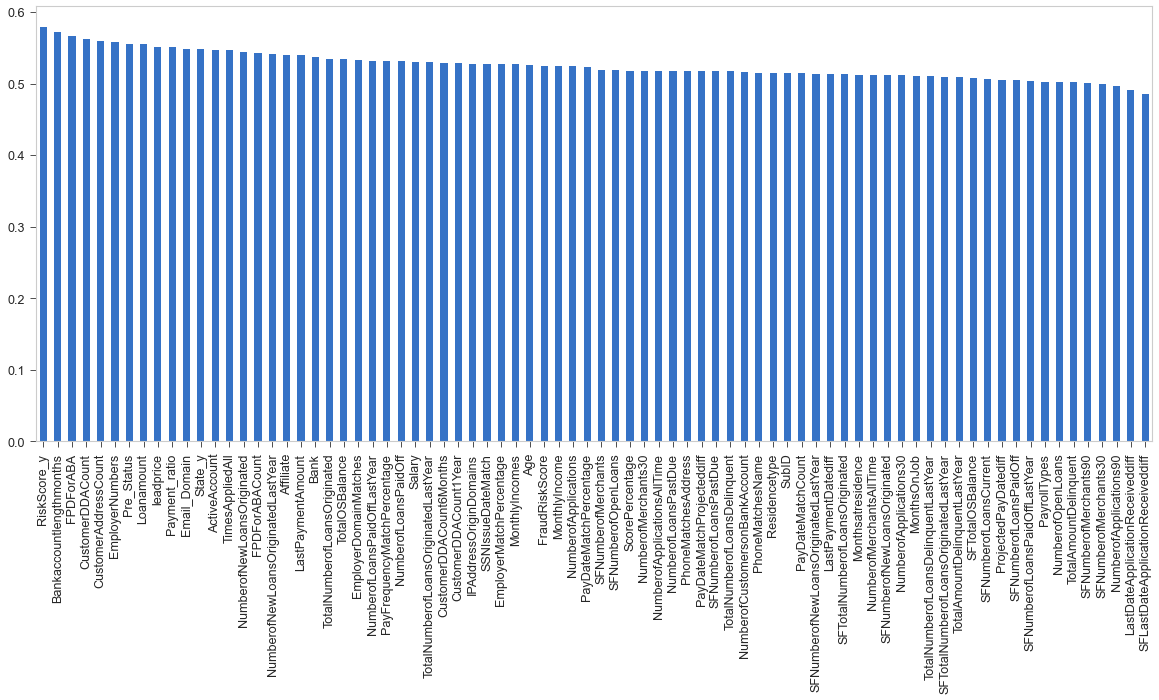

In [81]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train[training_vars].columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [82]:
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(74, 119)

In [83]:
selected_feat

NumberofOpenLoans            0.502009
NumberofLoansPaidOff         0.531134
NumberofLoansPastDue         0.517914
NumberofApplications         0.524228
NumberofApplications30       0.511597
                               ...   
ActiveAccount                0.547134
MonthlyIncome                0.524277
LastPaymentDatediff          0.513740
PayDateMatchProjecteddiff    0.517722
ProjectedPayDatediff         0.505199
Length: 74, dtype: float64

In [84]:
# create a function to build random forests and compare performance in train and test set
 
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=1000, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    train_pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, train_pred[:,1])))
    print('Test set')
    test_pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, test_pred[:,1])))
    
    # prediction
    result = rf.predict(X_test)
    
    # accuracy score
    score = metrics.accuracy_score(y_test, result)
    print('Random Forests accuracy score: {}'.format(score))
    score = metrics.precision_score(y_test, result)
    print('Random Forests precision score: {}'.format(score))
    score = metrics.recall_score(y_test, result)
    print('Random Forests recall score: {}'.format(score))
    
    cm = confusion_matrix(y_test, result)
    print(cm)
    
    # draw roc_auc curve line
    rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, test_pred[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('RF_ROC')
    plt.show()
    
    return rf, train_pred, test_pred, result, score

### Machine Learning algorithm building

#### xgboost

In [86]:
training_vars = training_vars_xgb

NameError: name 'training_vars_xgb' is not defined

In [87]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set = eval_set, verbose=False)

pred_prob_train = xgb_model.predict_proba(X_train[training_vars])
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob_train[:,1])))
pred_prob = xgb_model.predict_proba(X_test[training_vars])
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])) ) #roc_auc_score(y_test, pred_prob[:,1]
joblib.dump(xgb_model, 'xgb_model.pkl')

y_pred_train = xgb_model.predict(X_train[training_vars])
y_pred = xgb_model.predict(X_test[training_vars])
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision: {}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
print('Recall: {}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
# print('F-1 Score: {}'.format(2/(1/precision + 1/recall)))

xgb train roc-auc: 0.9932835213093547
xgb test roc-auc: 0.670114471823551
[[5309  193]
 [1051  142]]
Precision: 0.42388059701492536
Recall: 0.11902766135792121
Accuracy: 0.8141896938013443


In [88]:
# xgb_model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# # gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = params, scoring='roc_auc',iid=False,cv=5)



# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train[training_vars],y_train), verbose=3, random_state=1001 )
# random_search.fit(X_train[training_vars], y_train.ravel())
# print(random_search.best_params_, random_search.best_score_)

In [89]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
# # y_test = random_search.predict_proba(X_test[training_vars])

# pred_prob = random_search.predict_proba(X_train[training_vars])
# print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
# pred_prob = random_search.predict_proba(X_test[training_vars])
# print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))
# # joblib.dump(xgb_model, 'xgb_model_pre.pkl')

# # y_pred = xgb_model.predict(X_train[training_vars])
# y_pred = random_search.predict(X_test[training_vars])
# # Confusion Matrix
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print('Precision: {}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
# print('Recall: {}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
# print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
# print('F-1 Score: {}'.format(2/(1/precision + 1/recall)))

#### Random Forests

In [90]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred_prob = rf_model.predict_proba(X_train[training_vars])
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
pred_prob = rf_model.predict_proba(X_test[training_vars])
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))

y_pred = rf_model.predict(X_test[training_vars])

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision: {}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
print('Recall: {}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
# print('F-1 Score: {}'.format(2/(1/precision + 1/recall)))

RF train roc-auc: 1.0
RF test roc-auc: 0.6621419841843688
[[5464   38]
 [1162   31]]
Precision: 0.4492753623188406
Recall: 0.025984911986588432
Accuracy: 0.8207617625093353


#### Adaboost

In [91]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)

pred_prob = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
pred_prob = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))

y_pred = ada_model.predict(X_test[training_vars])
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision: {}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
print('Recall: {}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
# print('F-1 Score: {}'.format(2/(1/precision + 1/recall)))

Adaboost train roc-auc: 0.7222670846831574
Adaboost test roc-auc: 0.6874896212396133
[[5382  120]
 [1091  102]]
Precision: 0.4594594594594595
Recall: 0.08549874266554904
Accuracy: 0.8191187453323375


#### SVM

In [92]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train[training_vars], y_train)

SVC(random_state=0)

#### Grid Search

In [93]:
# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#               {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train[training_vars], y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print(best_accuracy)

#### Logistic Regression

In [94]:
# training_vars = selected_features_BE

In [95]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(random_state = 0)
logit_model.fit(X_train[training_vars], y_train)

# output the result
# pred_df = pd.DataFrame(
#     {"y_pred":y_pred,
#      "prob":prob[:,1]}
#                         )

# data_new = pd.concat([y_test, pred_df], axis=1)
# data_new.to_csv("prediction result.csv", index=False, encoding='utf8')

pred_prob = logit_model.predict_proba(X_train[training_vars])
print('Logistic Regression train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
pred_prob = logit_model.predict_proba(X_test[training_vars])
print('Logistic Regression test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))
joblib.dump(logit_model, 'logit_model.pkl')

y_pred = logit_model.predict(X_test[training_vars])

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision: {}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
print('Recall: {}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
# print('F-1 Score: {}'.format(2/(1/precision + 1/recall)))

Logistic Regression train roc-auc: 0.6186902704383069
Logistic Regression test roc-auc: 0.5977224467335356
[[5499    3]
 [1193    0]]
Precision: 0.0
Recall: 0.0
Accuracy: 0.8213592233009709


In [96]:
import statsmodels.api as sm

model = sm.Logit(y_train, X_train[training_vars])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.431949
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    FPD   No. Observations:                15619
Model:                          Logit   Df Residuals:                    15541
Method:                           MLE   Df Model:                           77
Date:                Fri, 10 Sep 2021   Pseudo R-squ.:                 0.08491
Time:                        18:50:34   Log-Likelihood:                -6746.6
converged:                       True   LL-Null:                       -7372.7
Covariance Type:            nonrobust   LLR p-value:                1.216e-211
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
NumberofOpenLoans                          0.0180      0.030      0.607      0.544      -0.040       0.076
NumberofLoansPaidOff                      -0.0638      0.022     -2.860      0.004      -0.108      -0.020
NumberofLoansPastDue                       0.0029      0.027      0.105      0.916      -0.050       0.056
NumberofApplications                       0.0180      0.010      1.874      0.061      -0.001       0.037
NumberofApplications30                    -0.0027      0.017     -0.155      0.877      -0.037       0.031
NumberofApplications90                    -0.0046      0.014     -0.335      0.738      -0.031       0.022
NumberofApplicationsAllTime               -0.0043      0.002     -2.849      0.004      -0.007      -0.001
NumberofMerchants30                       -5.5139      1.994     -2.765      0.006      -9.422      -1.606
NumberofMerchantsAllTime                  -0.0488      0.015     -3.186      0.001      -0.079      -0.019
NumberofNewLoansOriginated                 0.0282      0.014      1.960      0.050    2.62e-06       0.056
TotalNumberofLoansDelinquent               0.0245      0.029      0.843      0.399      -0.032       0.081
TotalNumberofLoansOriginated               0.0190      0.018      1.052      0.293      -0.016       0.055
TotalOSBalance                          9.141e-06   7.89e-06      1.158      0.247   -6.33e-06    2.46e-05
TotalAmountDelinquent                   -1.29e-05   4.06e-05     -0.318      0.750   -9.24e-05    6.66e-05
NumberofCustomersonBankAccount            -5.1831      2.500     -2.074      0.038     -10.082      -0.284
LastPaymentAmount                      -3.771e-05   7.92e-05     -0.476      0.634      -0.000       0.000
CustomerDDACount                           0.0576      0.014      4.187      0.000       0.031       0.085
CustomerDDACount6Months                    2.0374      1.377      1.480      0.139      -0.660       4.735
CustomerDDACount1Year                     -1.8064      1.684     -1.073      0.283      -5.107       1.494
CustomerAddressCount                       0.0307      0.014      2.169      0.030       0.003       0.058
FPDForABA                                  0.0199      0.005      3.669      0.000       0.009       0.030
FPDForABACount                         -1.088e-06   8.43e-07     -1.290      0.197   -2.74e-06    5.65e-07
NumberofNewLoansOriginatedLastYear        -0.0379      0.016     -2.388      0.017      -0.069      -0.007
TotalNumberofLoansDelinquentLastYear      -0.0018      0.030     -0.059      0.953      -0.061       0.057
TotalNumberofLoansOriginatedLastYear      -0.0455      0.020     -2.257      0.024      -0.085      -0.006
TotalAmountDelinquentLastYear           8.374e-05   4.22e-05      1.984      0.047    1.02e-06       0.000
NumberofLoansPaidOffLastYear               0.0852      0.024      3.483      0.000       0.037       0.133
SFNumberofLoansCurrent         

In [97]:
#Backward Elimination
cols = list(training_vars)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['NumberofOpenLoans', 'NumberofLoansPaidOff', 'NumberofMerchantsAllTime', 'NumberofNewLoansOriginated', 'TotalNumberofLoansDelinquent', 'NumberofCustomersonBankAccount', 'CustomerDDACount', 'CustomerDDACount6Months', 'FPDForABA', 'NumberofNewLoansOriginatedLastYear', 'NumberofLoansPaidOffLastYear', 'SFNumberofMerchants', 'PhoneMatchesAddress', 'IPAddressOriginDomains', 'PayDateMatchPercentage', 'Bank', 'Monthsatresidence', 'Age', 'Email_Domain', 'Payment_ratio', 'State_y', 'Pre_Status', 'FraudRiskScore', 'RiskScore_y', 'Loanamount', 'Affiliate', 'SubID', 'EmployerNumbers', 'ActiveAccount', 'LastDateApplicationReceiveddiff', 'LastPaymentDatediff']


In [98]:
# The estimated coefficients are the log odds. 
# By exponentiating these values, we can calculate the odds, which are easier to interpret.
np.exp(result.params)

NumberofOpenLoans                    1.018142
NumberofLoansPaidOff                 0.938159
NumberofLoansPastDue                 1.002860
NumberofApplications                 1.018155
NumberofApplications30               0.997321
                                       ...   
LastDateApplicationReceiveddiff      0.999684
SFLastDateApplicationReceiveddiff    1.000065
LastPaymentDatediff                  1.000091
PayDateMatchProjecteddiff            1.000012
ProjectedPayDatediff                 1.000000
Length: 78, dtype: float64

In [99]:
logit_model.coef_

array([[-1.35405832e-06, -3.67298336e-05, -4.93308125e-08,
        -5.46096920e-07,  1.90035562e-06,  1.66381414e-06,
        -2.03904770e-05, -2.47442044e-07, -5.42994616e-06,
        -2.21816553e-05,  1.45126753e-06, -4.30778047e-05,
        -3.98568232e-07,  2.31065425e-05, -2.55472107e-07,
        -1.38675930e-04,  8.08052917e-06, -1.60468273e-07,
        -1.80345528e-07,  4.66195161e-06,  8.66108967e-06,
        -6.51635201e-07, -1.82870028e-05,  1.28579335e-06,
        -3.21729715e-05,  8.18335299e-05, -2.57930297e-05,
        -7.92943041e-07,  1.08395848e-07, -2.47329383e-06,
         2.31291653e-07, -2.02282548e-07,  1.28974688e-07,
        -2.46767700e-07, -1.36801602e-06, -3.14308003e-06,
         1.71476325e-05, -1.55379799e-06, -3.21213707e-06,
        -2.56376076e-06,  2.05766043e-07,  7.22881041e-08,
         2.61879759e-07,  1.42243303e-07, -2.39060135e-07,
         3.03708398e-07,  1.15693588e-06, -6.01051554e-07,
        -8.52509201e-07, -1.05639774e-06, -5.24028465e-0

#### GBDT

In [105]:
# from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
# gbr = GradientBoostingClassifier(n_estimators=3000, max_depth=4, min_samples_split=3, learning_rate=0.1)
# gbr = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, subsample=1
#                                  , min_samples_split=2, min_samples_leaf=1, max_depth=3
#                                  , init=None, random_state=None, max_features=None
#                                  , verbose=0, max_leaf_nodes=None
#                                  , warm_start=False)

gbr = GradientBoostingClassifier(
    # boosting参数
    init=None,
    n_estimators=3000,
    learning_rate=0.1, 
    subsample=0.8,
    loss='deviance',
    # 分割参数
    max_features='sqrt',
    criterion='friedman_mse',
    # 分割停止参数
    min_samples_split =80, 
    min_impurity_split=None,
    min_impurity_decrease=0.0,
    max_depth=4,
    max_leaf_nodes=None,
    # 剪枝参数
    min_samples_leaf =7, 
    warm_start=False,
    random_state=10
)
# gsearch1 = GridSearchCV(estimator = gbc, param_grid = {'n_estimators':[1000,2000,3000]}, scoring='roc_auc',iid=False,cv=5)
# gsearch1.fit(X_train[training_vars], y_train.ravel())
# print(gsearch1.best_params_, gsearch1.best_score_)

gbr.fit(X_train[training_vars], y_train.ravel())

joblib.dump(gbr, 'gbdt_model1.pkl')   # 保存模型

pred_prob = gbr.predict_proba(X_train[training_vars])
print('GBDT train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
pred_prob = gbr.predict_proba(X_test[training_vars])
print('GBDT test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))

acc_train = gbr.score(X_train[training_vars], y_train)
acc_test = gbr.score(X_test[training_vars], y_test)
# print('GBDT train accuracy: {}'.format(acc_train))
# print('GBDT train accuracy: {}'.format(acc_test))

y_pred = gbr.predict(X_test[training_vars])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1] + cm[1,0])
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
# print('F-1 Score: {}'.format(2/(1/precision + 1/recall)))

GBDT train roc-auc: 0.9998946586911099
GBDT test roc-auc: 0.6673907804005127
[[5247  255]
 [1038  155]]
Precision: 0.3780487804878049
Recall: 0.12992455993294216
Accuracy: 0.8068707991038088


No Skill: ROC AUC=0.500
GBDT: ROC AUC=0.667


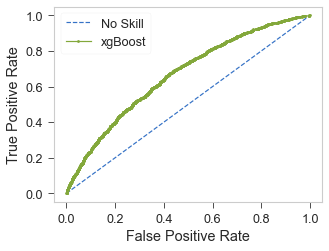

In [106]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_train[training_vars], y_train)

# predict probabilities
lr_probs = gbr.predict_proba(X_test[training_vars])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBDT: ROC AUC=%.3f' % (lr_auc))   
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='xgBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [107]:
# Testset Prediction Result Output - need some work on merge

pred_df = pd.DataFrame(
    {"predicted":y_pred,
     "prob_0":pred_prob[:, 0],
     "prob_1":pred_prob[:, 1]
    }
                        )
# y_test = y_test.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
# X_train = X_train.reset_index(drop = True)
predict = pd.concat([X_test, pred_df], axis = 1)
# predict.to_csv('Predict_testset.csv', encoding = 'utf-8')

In [108]:
predict['Score'] = predict['prob_0'].mul(1000)
predict.head()

,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,NumberofCustomersonBankAccount,LastPaymentAmount,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansOriginatedLastYear,SFNumberofLoansPaidOffLastYear,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLLastPaymentAmount,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,DistancebetweenHomeZipandIPAddress,DistancebetweenAltZipandIPAddress,PhoneMatchesAddress,PhoneMatchesName,SSNIssueDateMatch,EmployerDomainMatches,IPAddressOriginDomains,MonthlyIncomes,PayDateMatchCount,PayDateMatchPercentage,PayrollTypes,EmployerMatchPercentage,PayFrequencyMatchPercentage,ScorePercentage,Value,DrivLicState,ReasonCode1,ReasonCode2,ReasonCode3,ReasonCode4,ApprovalDte,Bank,Bankaccountlengthmonths,Monthsatresidence,Residencetype,MonthsOnJob,Salary,Age,Email_Domain,Payment_ratio,State_y,Pre_Status,TimesAppliedAll,FraudRiskScore,RiskScore_y,Loanamount,Affiliate,SubID,leadprice,FPD,EmployerNumbers,ActiveAccount,MonthlyIncome,LastDateApplicationReceiveddiff,SFLastDateApplicationReceiveddiff,LastPaymentDatediff,PayDateMatchProjecteddiff,ProjectedPayDatediff,PaymentToDatediff,predicted,prob_0,prob_1,Score
0,0.189189,3.0,0.0,14.0,2.0,8.0,2.0,6.0,24.0,0.177112,0.165563,2.0,17.0,1.0,17.0,891,0.0,0.174783,50.0,3.0,0.176570,0.198373,3.0,7.0,29093.0,17.0,1.0,17.0,0.0,0.0,14.0,2.0,2.0,6.0,2.0,4.0,0.212418,3.0,9.0,0.221090,1.0,0.207300,8.0,8.0,600,8.0,8.0,6.0,0.0,1.0,0.0,8.0,0.0,4.0,1.0,3.0,15.0,1.0,0.162992,0.16534,9.0,0.0,9.0,291.0,50.0,9.0,0.0,9.0,0.0,8.0,1059.0,1059.0,0,0,1,0.00,0.168544,1031.16,0.0,0.0,1,0.45,0.14,0.34,508.0,0.162588,0.181839,0.175389,0.181704,0.176564,9/18/2019,0.189050,34.0,40.0,1,0.187638,2000.0,34,0.194289,0.090000,0.148704,0.158459,1,116.0,780.0,0.162637,0.122428,0,40,0,1,0.151094,0.000000,17.178472,25.570833,23.702778,-12.297222,-16.297222,0.702778,0,0.903179,0.096821,903.179208
1,0.184039,0.0,0.0,1.0,0.0,5.0,1.0,1.0,22.0,0.189878,0.192255,1.0,1.0,0.0,1.0,0,0.0,0.174783,200.0,6.0,0.228070,0.215462,2.0,7.0,941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.173446,0.0,6.0,0.221090,0.0,0.178339,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,16.0,0.0,0.188776,0.19223,0.0,0.0,0.0,1345.0,240.0,0.0,0.0,0.0,0.0,0.0,6031.0,6031.0,0,0,0,0.00,0.193999,2320.00,227.0,0.1,0,0.67,0.62,0.58,533.0,0.211610,0.181839,0.175389,0.181704,0.172977,12/10/2019,0.191973,4.0,3.0,1,0.163347,1559.0,41,0.194289,0.115459,0.191063,0.206707,4,88.0,807.0,0.162637,0.165517,1,0,0,4,0.151094,0.000000,28.162500,136.822222,1225.620139,-5.379861,-12.379861,0.620139,0,0.871549,0.

Score_cat
(8.732000000000001, 612.654]    670
(612.654, 777.756]              669
(777.756, 858.697]              670
(858.697, 906.674]              669
(906.674, 936.909]              670
(936.909, 958.701]              669
(958.701, 974.348]              669
(974.348, 985.501]              670
(985.501, 993.566]              669
(993.566, 999.935]              670
Name: FPD, dtype: int64


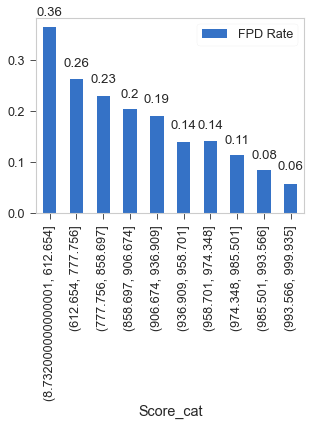

In [109]:
def score_distribution(dataset, var, bin_num, target1):
    var_discretised, intervals = pd.qcut(dataset[var], bin_num, labels=None, retbins=True, precision=3, duplicates='drop')
    # NewScore_discretised = pd.cut(dataset.NewFT_Score, 10)
    dataset[var +'_cat'] = var_discretised   # categorical variable

    a = dataset.groupby([var +'_cat'])[target1].sum() / dataset.groupby(var +'_cat')[target1].count()  #np.float(len(data))
#     b = dataset.groupby([var +'_cat'])[target2].sum() / dataset.groupby(var +'_cat')[target2].count()
    c = dataset.groupby([var +'_cat'])[target1].count() 
#     d = dataset.groupby([var +'_cat'])['FeeDefault'].sum() / dataset.groupby(var +'_cat')['LoanAmount'].sum()

    x = dataset[var +'_cat'].unique().astype(str)
    y = round(a, 2)
    #  print "{0:.0%}".format(1./3)  

    temp_1 = pd.concat([a], axis=1)
    temp_1.columns = ['FPD Rate']
#     c.columns = ['LoanVolume']
    print(c)
    temp_1.plot(kind = 'bar')
    for x, y in zip(range(len(x)), y):
        plt.text(x, y + 0.02, y, ha = 'center', va = 'bottom')
    plt.xticks(rotation= 90)

score_distribution(predict, 'Score', 10, 'FPD')

Score_disc
(7.999, 107.0]       38
(107.0, 206.0]       64
(206.0, 305.0]       75
(305.0, 404.0]       84
(404.0, 503.0]      155
(503.0, 602.0]      226
(602.0, 701.0]      313
(701.0, 800.0]      545
(800.0, 899.0]     1034
(899.0, 998.0]     3995
(998.0, 1097.0]     166
Name: FPD, dtype: int64


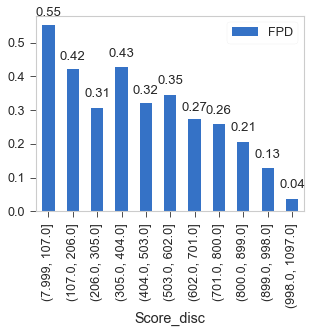

In [110]:
def score_distribution_decile(data, var, bin_num):
    var_range = data[var].max() - data[var].min()
    min_value = int(np.floor(data[var].min()))
    max_value = int(np.ceil(data[var].max()))


    inter_value = int(np.round(var_range/bin_num))
    intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
    # intervals = [640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920]
    data[var+'_disc'] = pd.cut(x = data[var], bins=intervals, include_lowest=True)

    a = data.groupby([var+'_disc'])['FPD'].mean()  #np.float(len(data))
#     b = data.groupby([var+'_disc'])['ZPD'].sum() / data.groupby([var+'_disc'])['ZPD'].count()
    c = data.groupby([var+'_disc'])['FPD'].count()
    #     d = dataset.groupby([var +'_cat'])['FeeDefault'].sum() / dataset.groupby(var +'_cat')['LoanAmount'].sum()

    x = data[var+'_disc'].unique().astype(str)
    y = round(a, 2)
    #  print "{0:.0%}".format(1./3)  

    temp_1 = pd.concat([a], axis=1)
    #     c.columns = ['LoanVolume']
    print(c)
    temp_1.plot(kind = 'bar')
    for x, y in zip(range(len(x)), y):
        plt.text(x, y + 0.02, y, ha = 'center', va = 'bottom')
    plt.xticks(rotation= 90)
    
score_distribution_decile(predict, 'Score', 10)

In [111]:
predict.describe()

,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,NumberofCustomersonBankAccount,LastPaymentAmount,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansOriginatedLastYear,SFNumberofLoansPaidOffLastYear,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLLastPaymentAmount,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,DistancebetweenHomeZipandIPAddress,DistancebetweenAltZipandIPAddress,PhoneMatchesAddress,PhoneMatchesName,SSNIssueDateMatch,EmployerDomainMatches,IPAddressOriginDomains,MonthlyIncomes,PayDateMatchCount,PayDateMatchPercentage,PayrollTypes,EmployerMatchPercentage,PayFrequencyMatchPercentage,ScorePercentage,Value,DrivLicState,ReasonCode1,ReasonCode2,ReasonCode3,ReasonCode4,Bank,Bankaccountlengthmonths,Monthsatresidence,Residencetype,MonthsOnJob,Salary,Age,Email_Domain,Payment_ratio,State_y,Pre_Status,TimesAppliedAll,FraudRiskScore,RiskScore_y,Loanamount,Affiliate,SubID,leadprice,FPD,EmployerNumbers,ActiveAccount,MonthlyIncome,LastDateApplicationReceiveddiff,SFLastDateApplicationReceiveddiff,LastPaymentDatediff,PayDateMatchProjecteddiff,ProjectedPayDatediff,PaymentToDatediff,predicted,prob_0,prob_1,Score
count,6694.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.00000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.00000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6.695000e+03,6695.000000,6695.000000,6695.000000,6695.000000,669

In [112]:
predict[predict['Score'] >= 636]['FPD'].describe()

count    5969.000000
mean        0.156643
std         0.363494
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FPD, dtype: float64

In [113]:
pred_df = pd.DataFrame(
    {"predicted":y_pred_train,
     "prob_0":pred_prob_train[:, 0],
     "prob_1":pred_prob_train[:, 1]
    }
    
                        )
# y_test = y_test.reset_index(drop = True)
X_train = X_train.reset_index(drop = True)
# X_train = X_train.reset_index(drop = True)
predict_train = pd.concat([X_train, pred_df], axis = 1)
# predict.to_csv('Predict_testset.csv', encoding = 'utf-8')
predict_train['Score'] = predict_train['prob_0'].mul(1000)
total = pd.concat([predict, predict_train])
total.describe()

,NumberofLoansCurrent,NumberofOpenLoans,NumberofLoansinCollections,NumberofLoansPaidOff,NumberofLoansPastDue,NumberofApplications,NumberofApplications30,NumberofApplications90,NumberofApplicationsAllTime,NumberofMerchants30,NumberofMerchants90,NumberofMerchantsAllTime,NumberofNewLoansOriginated,TotalNumberofLoansDelinquent,TotalNumberofLoansOriginated,TotalOSBalance,TotalAmountDelinquent,NumberofCustomersonBankAccount,LastPaymentAmount,CustomerDDACount,CustomerDDACount6Months,CustomerDDACount1Year,CustomerAddressCount,FPDForABA,FPDForABACount,NumberofNewLoansOriginatedLastYear,TotalNumberofLoansDelinquentLastYear,TotalNumberofLoansOriginatedLastYear,TotalAmountDelinquentLastYear,NumberofLoansinCollectionsLastYear,NumberofLoansPaidOffLastYear,SFNumberofLoansCurrent,SFNumberofOpenLoans,SFNumberofLoansPaidOff,SFNumberofLoansPastDue,SFNumberofApplications,SFNumberofApplications30,SFNumberofApplications90,SFNumberofApplicationsAllTime,SFNumberofMerchants,SFNumberofMerchants30,SFNumberofMerchants90,SFNumberofNewLoansOriginated,SFTotalNumberofLoansOriginated,SFTotalOSBalance,SFNumberofNewLoansOriginatedLastYear,SFTotalNumberofLoansOriginatedLastYear,SFNumberofLoansPaidOffLastYear,OLNumberofLoansCurrent,OLNumberofOpenLoans,OLNumberofLoansinCollections,OLNumberofLoansPaidOff,OLNumberofLoansPastDue,OLNumberofApplications,OLNumberofApplications30,OLNumberofApplications90,OLNumberofApplicationsAllTime,OLNumberofMerchants,OLNumberofMerchants30,OLNumberofMerchants90,OLNumberofNewLoansOriginated,OLTotalNumberofLoansDelinquent,OLTotalNumberofLoansOriginated,OLTotalOSBalance,OLLastPaymentAmount,OLNumberofNewLoansOriginatedLastYear,OLTotalNumberofLoansDelinquentLastYear,OLTotalNumberofLoansOriginatedLastYear,OLNumberofLoansinCollectionsLastYear,OLNumberofLoansPaidOffLastYear,DistancebetweenHomeZipandIPAddress,DistancebetweenAltZipandIPAddress,PhoneMatchesAddress,PhoneMatchesName,SSNIssueDateMatch,EmployerDomainMatches,IPAddressOriginDomains,MonthlyIncomes,PayDateMatchCount,PayDateMatchPercentage,PayrollTypes,EmployerMatchPercentage,PayFrequencyMatchPercentage,ScorePercentage,Value,DrivLicState,ReasonCode1,ReasonCode2,ReasonCode3,ReasonCode4,Bank,Bankaccountlengthmonths,Monthsatresidence,Residencetype,MonthsOnJob,Salary,Age,Email_Domain,Payment_ratio,State_y,Pre_Status,TimesAppliedAll,FraudRiskScore,RiskScore_y,Loanamount,Affiliate,SubID,leadprice,FPD,EmployerNumbers,ActiveAccount,MonthlyIncome,LastDateApplicationReceiveddiff,SFLastDateApplicationReceiveddiff,LastPaymentDatediff,PayDateMatchProjecteddiff,ProjectedPayDatediff,PaymentToDatediff,predicted,prob_0,prob_1,Score
count,22313.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,223

Score_cat
(8.732000000000001, 454.592]    2232
(454.592, 752.608]              2231
(752.608, 846.592]              2231
(846.592, 893.392]              2232
(893.392, 923.355]              2231
(923.355, 944.842]              2231
(944.842, 962.188]              2232
(962.188, 976.284]              2231
(976.284, 988.368]              2231
(988.368, 999.935]              2232
Name: FPD, dtype: int64


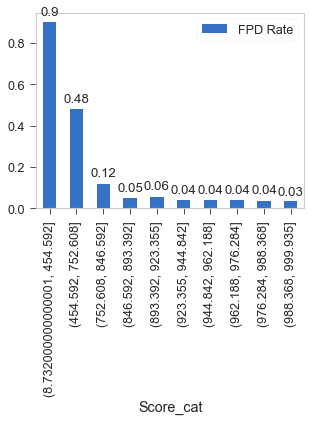

In [114]:
score_distribution(total, 'Score', 10, 'FPD')

Score_cat
(40.940000000000005, 343.478]    139
(343.478, 610.027]               138
(610.027, 777.379]               138
(777.379, 839.896]               138
(839.896, 879.535]               138
(879.535, 906.616]               138
(906.616, 931.723]               138
(931.723, 953.735]               138
(953.735, 975.487]               138
(975.487, 998.688]               139
Name: FPD, dtype: int64


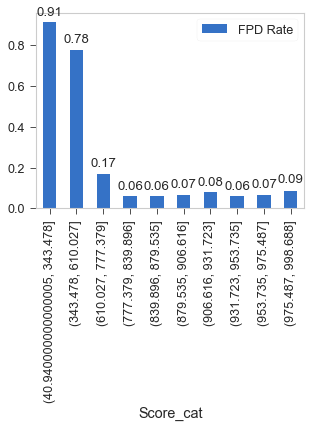

In [115]:
score_distribution(total[pd.to_datetime(total['ApprovalDte']) >= '03/01/2021'], 'Score', 10, 'FPD')

In [116]:
total[pd.to_datetime(total['ApprovalDte']) >= '03/01/2021']['FPD'].describe()

count    1382.000000
mean        0.232996
std         0.422893
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FPD, dtype: float64

In [117]:
total[(pd.to_datetime(total['ApprovalDte']) >= '03/01/2021') & (total['Score'] >= 643)]['FPD'].describe()

count    1094.000000
mean        0.079525
std         0.270680
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FPD, dtype: float64

### Select threshold for maximum accuracy

In [120]:
# pred_ls = []
# for model in [xgb_model, rf_model, ada_model, logit_model]:
#     pred_ls.append(pd.Series(model.predict_proba(X_test[numerical])[:,1]))

# final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)
# print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

In [119]:
tpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
thresholds

NameError: name 'final_pred' is not defined

In [ ]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

### Feature importance

In [ ]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
training_vars_rf = [i for i in importance.index if importance[i] >= 0.01]
importance.plot.bar(figsize=(12,6))

In [ ]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
training_vars_xgb = [i for i in importance.index if importance[i] >= 0.01]
# training_vars_xgb = importance[:30].index
importance.plot.bar(figsize=(12,6))

In [ ]:
importance = pd.Series(gbr.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance[:20].plot.bar(figsize=(12,6))

In [ ]:
importance = pd.Series(np.abs(logit_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
training_vars_lr = importance[:10].index
importance.plot.bar(figsize=(12,6))